# Práctica de Machine Learning - AIRBNB

**Tarea**

Es un problema de regresión - predecir el precio del airbnb utilizando los datos 
disponibles:

* Generación de nuevas características a partir de las existentes
* Codificación de variables
* Análisis exploratorio
* Selección y evaluación del modelo
* Comparativa de distintos algoritmos

## 1.- Adquisición de los datos

In [1]:
# Librerías genéricas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
# Librerías específicas
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import tree

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# Random seed
seed = 9876
np.random.seed(seed)

### 1.1.- Cargar datos

In [4]:
# Importamos los datos (csv a pandas.dataframe)
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', decimal='.', index_col='ID')
data.head()

Listing Url       Scrape ID Last Scraped  \
ID                                                                             
11210388  https://www.airbnb.com/rooms/11210388  20170306202425   2017-03-07   
17471131  https://www.airbnb.com/rooms/17471131  20170407214050   2017-04-08   
17584891  https://www.airbnb.com/rooms/17584891  20170407214050   2017-04-08   
5398030    https://www.airbnb.com/rooms/5398030  20170407214050   2017-04-08   
18104606  https://www.airbnb.com/rooms/18104606  20170407214050   2017-04-08   

                                         Name  \
ID                                              
11210388       The Loft-Full Bath-Deck w/View   
17471131           Claris I, Friendly Rentals   
17584891  Style Terrace Red, Friendly Rentals   
5398030     Picasso Suite 1.4 Paseo de Gracia   
18104606       Smart City Centre Apartment II   

                                                    Summary  \
ID                                                            
11210388  Loft in the Hill country 12-15 minutes directl...   
17471131  This apartment has: 1 double bed, 1 double sof...   
17584891  This apartment has: 1 double bed, 1 double sof...   
5398030   Live like a local in Barcelona's most chic dis...   
18104606  Unique apartment in vibrant neighborhoods, car...   

                                                      Space  \
ID                                                            
11210388  This loft has a spectacular view of the hills ...   
17471131  This apartment has: 1 double bed, 1 double sof...   
17584891  This apartment has: 1 double bed, 1 double sof...   
5398030   You wake up to the sun rising over Barcelona's...   
18104606  License: HUTB-005313 Charming apartment, locat...   

                                                Description  \
ID                                                            
11210388  Loft in the Hill country 12-15 minutes directl...   
17471131  This apartment has: 1 double bed, 1 double sof...   
17584891  This apartment has: 1 double bed, 1 double sof...   
5398030   Live like a local in Barcelona's most chic dis...   
18104606  Unique apartment in vibrant neighborhoods, car...   

         Experiences Offered  \
ID                             
11210388                none   
17471131                none   
17584891                none   
5398030                 none   
18104606                none   

                                      Neighborhood Overview  \
ID                                                            
11210388  This neighborhood is located in the hills west...   
17471131  Plaza   Cataluña Catalonia Square is the large...   
17584891  Plaza   Cataluña Catalonia Square is the large...   
5398030   We're right in the heart of the chic L'Eixampl...   
18104606                                                NaN   

                                                      Notes  ...  \
ID                                                           ...   
11210388  The loft is located on a gated property.  Ther...  ...   
17471131                                                NaN  ...   
17584891                                                NaN  ...   
5398030                           Local permit: HUTB-006794  ...   
18104606                                                NaN  ...   

         Review Scores Communication Review Scores Location  \
ID                                                            
11210388                        10.0                   10.0   
17471131                        10.0                    8.0   
17584891                         NaN                    NaN   
5398030                         10.0                   10.0   
18104606                         NaN                    NaN   

         Review Scores Value      License Jurisdiction Names  \
ID                                                             
11210388                10.0          NaN                NaN   
17471131                10.

### 1.2.- División de los datos (Train - Test)

Para evitar problemas de manipulación de datos, primero vamos a dividir nuestros datos en train - test, vamos a usar 80% train - 20% test

In [5]:
train, test = train_test_split(data, test_size = 0.20, random_state=3134, shuffle=True)

In [6]:
# Recuento de datos
print("Train: Tenemos {} muestras".format(train.shape[0]))
print("Test: Tenemos {} muestras".format(test.shape[0]))

Train: Tenemos 11824 muestras
Test: Tenemos 2956 muestras


### 1.3.- Eliminación de características sin valor para nuestro objetivo

In [7]:
# Diccionario de todas las columnas y sus respectivos tipos
cols_dtype = {col: train[col].dtype for col in train.columns}
cols_dtype

{'Listing Url': dtype('O'),
 'Scrape ID': dtype('int64'),
 'Last Scraped': dtype('O'),
 'Name': dtype('O'),
 'Summary': dtype('O'),
 'Space': dtype('O'),
 'Description': dtype('O'),
 'Experiences Offered': dtype('O'),
 'Neighborhood Overview': dtype('O'),
 'Notes': dtype('O'),
 'Transit': dtype('O'),
 'Access': dtype('O'),
 'Interaction': dtype('O'),
 'House Rules': dtype('O'),
 'Thumbnail Url': dtype('O'),
 'Medium Url': dtype('O'),
 'Picture Url': dtype('O'),
 'XL Picture Url': dtype('O'),
 'Host ID': dtype('int64'),
 'Host URL': dtype('O'),
 'Host Name': dtype('O'),
 'Host Since': dtype('O'),
 'Host Location': dtype('O'),
 'Host About': dtype('O'),
 'Host Response Time': dtype('O'),
 'Host Response Rate': dtype('float64'),
 'Host Acceptance Rate': dtype('O'),
 'Host Thumbnail Url': dtype('O'),
 'Host Picture Url': dtype('O'),
 'Host Neighbourhood': dtype('O'),
 'Host Listings Count': dtype('float64'),
 'Host Total Listings Count': dtype('float64'),
 'Host Verifications': dtype('O'),

En un primer vistazo se puede observar que hay columnas que no aportan valor a nuestro objetivo vamos a eliminarlas directamente ya que estas no serán útil, esto se va a realizar en nuestro set de datos de entrenamiento

In [8]:
# Por estética y por practicidad, voy a poner la variable target al principio
cols_sorted = train.columns.to_list()
cols_sorted.remove('Price')
cols_sorted.insert(0, 'Price')
new_train = train[cols_sorted]
del train
train = new_train
del new_train

In [9]:
# Nota:
#   Para este apartado se ha ido analizando cada característica para ver que tipo de datos tiene mediante:
#   train[<característica>].unique() y train[<característica>].describe()

In [10]:
cols_to_del = [] # Variable de características que se van a eliminar (total)

* Texto como metadatos sin valor para nuestro objetivo

In [11]:
# Busqueda de caracteristicas
substrings = ('url','scrape')
for substring in substrings:
    [cols_to_del.append(s) for s in train.columns if substring in s.lower()]

# Conteo de características
print("número de características a eliminar (acumulado): {}".format(len(cols_to_del)))

número de características a eliminar (acumulado): 11


* Características relacionadas pero sin valor para nuestro modelo.
(Aquí incluyo características que podrían ser útilies si se hace un análisis mas profundo de dicha características, pero como ya tenemos suficientes no croe que valga la pena)

In [12]:
# Columnas a eliminar
[cols_to_del.append(s) for s in ['Name', 'Host Name', 'Description', 'Interaction', 'Summary', 'Space', 'Experiences Offered', 
                                 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 
                                 'House Rules', 'Host ID', 'Host Since', 'Host Location',
                                 'Host About', 'Host Neighbourhood', 'Host Listings Count',
                                 'Host Total Listings Count', 'Host Verifications', 'Amenities', 
                                 'Calendar Updated', 'Has Availability', 'First Review', 'Last Review',
                                 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Features']]

# Conteo de características
print("número de características a eliminar (acumulado): {}".format(len(cols_to_del)))

número de características a eliminar (acumulado): 40


* Características que no aportan información nueva (linealmente dependientes de nuestra variable target)

In [13]:
# Busqueda de caracteristicas
substring = 'price'
[cols_to_del.append(s) for s in train.columns if substring in s.lower()]
cols_to_del.remove('Price')

# Conteo de características
print("número de características a eliminar (acumulado): {}".format(len(cols_to_del)))

número de características a eliminar (acumulado): 42


Por último eliminamos las características

In [14]:
# Eliminamos las columnas con drop, axis=1 para columnas
train = train.drop(cols_to_del, axis=1)

# Características eliminadas
print("Se ha eliminado {}, nos quedan {}".format(len(cols_to_del), len(train.columns)))

Se ha eliminado 42, nos quedan 46


### 1.4.- Arreglando tipos

Lo primero es mostrar que tipos tenemos en las distintas características, así podremos analizarlas una a una

In [15]:
# dtypes, muestra los tipos de cada característica
train.dtypes

Price                             float64
Host Response Time                 object
Host Response Rate                float64
Host Acceptance Rate               object
Street                             object
Neighbourhood                      object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
State                              object
Zipcode                            object
Market                             object
Smart Location                     object
Country Code                       object
Country                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                          

Se observa como las variables se dividen en númericas y object, muchas de estas últimas deberían considerarse como categóricas

In [16]:
# Características que deberían ser categóricas
cols_categoricals = ['Host Response Time', 'Street', 'Neighbourhood', 
                     'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
                     'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
                     'Country', 'Property Type', 'Room Type', 'Bed Type']
for col in cols_categoricals:
    train[col] = train[col].astype('category')

In [17]:
# Situación actual
print("Tenemos {} filas y {} columnas".format(train.shape[0], train.shape[1]))

Tenemos 11824 filas y 46 columnas


## 2.- Análisis exploratorio

### 2.1.- Análisis de características (estadística y visualización)

In [18]:
# Primero vamos a examinar la variable target
train['Price'].isna().value_counts()

False    11812
True        12
Name: Price, dtype: int64

In [19]:
# Tenemos nan values en Price, vamos a eliminarlo
train = train[~train['Price'].isna()]

Aún tenemos muchas características, vamos a investigar a ver que podemos hacer con ellas, el objetivo es eliminar las que contengan poca información, o sea redundante, vamos a empezar mirando las variables categóricas

In [20]:
# Mi histograma, será de ayuda para analizar características
def my_hist(df, colname):
    # Variables
    labels = df[colname][~df[colname].isna()].value_counts().index.values
    values = df[colname][~df[colname].isna()].value_counts().values
    limit = 10 if len(labels) > 15 else len(labels)
    
    # Nuestro datos (con un límite de 10 máximo)
    data = [labels[0:limit], values[0:limit]]
    
    # Uso de Matplotlib
    plt.bar(data[0], data[1])
    plt.title (colname)
    plt.xticks(rotation=45)

* Análisis de datos del anfitrión

[]

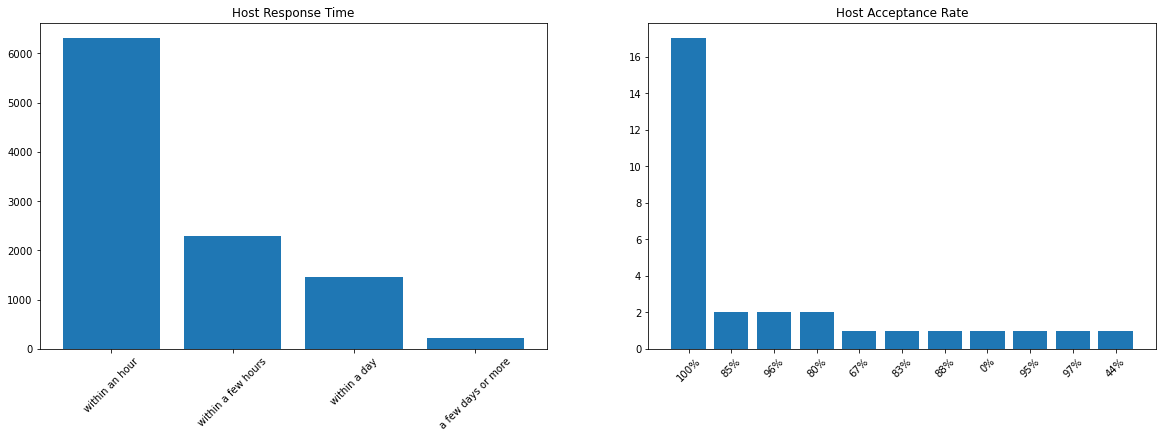

In [21]:
# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 2, 1)
my_hist(train, 'Host Response Time')
fig.add_subplot(1, 2, 2)
my_hist(train, 'Host Acceptance Rate')

# Muestro en pantalla
plt.plot()

In [22]:
# 'Host Acceptance Rate' tiene muy pocas instancias podemos verlo aquí, esta característica puede descartarse
train['Host Acceptance Rate'].describe()

count       30
unique      11
top       100%
freq        17
Name: Host Acceptance Rate, dtype: object

In [23]:
# Elimino dicha característica
train = train.drop('Host Acceptance Rate', axis=1)

In [24]:
# Situación actual
print("Tenemos {} filas y {} columnas".format(train.shape[0], train.shape[1]))

Tenemos 11812 filas y 45 columnas


* Análisis de datos de la propiedad

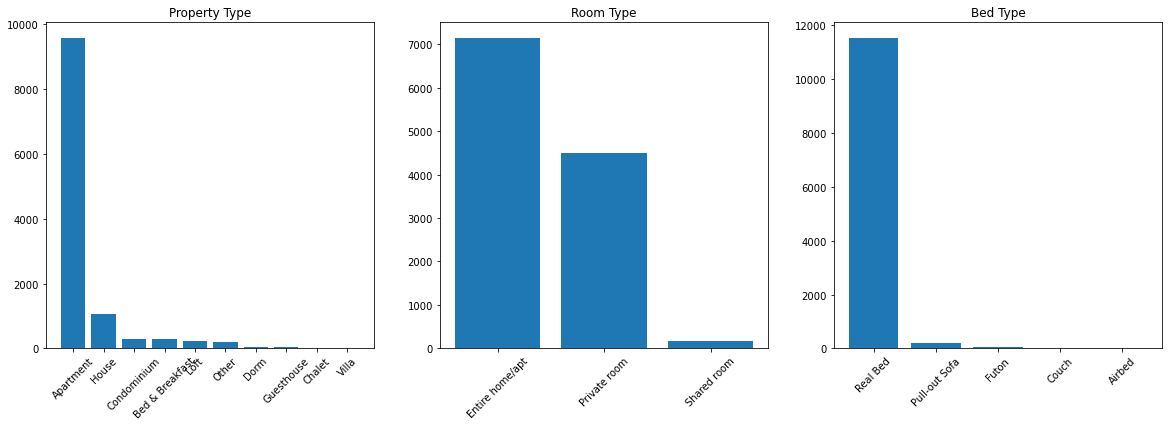

In [25]:
# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 3, 1)
my_hist(train, 'Property Type')
fig.add_subplot(1, 3, 2)
my_hist(train, 'Room Type')
fig.add_subplot(1, 3, 3)
my_hist(train, 'Bed Type')

# Muestro en pantalla
plt.show()

In [26]:
# 'Bed Type' tiene la gran mayoría de instancias como 'real Bed' podemos verlo aquí, así que esta característica podría descartarse
p_c = train['Bed Type'].describe()[3] / train['Bed Type'].describe()[0] * 100
print("El {}% de los datos son {}, que es el valor con mayor frecuencia".format(p_c, train['Bed Type'].describe()[2]))

El 97.7311208940061% de los datos son Real Bed, que es el valor con mayor frecuencia


In [27]:
# Me quedo con las de mayor frecuencia y elimino dicha característica
train = train.loc[train['Bed Type'] == 'Real Bed']
train.drop('Bed Type', axis=1, inplace=True)

In [28]:
# Para 'Property Type' creo que es buena idea realizar una transformación, lo haremos en el punto 3 (Si vale la pena)
p_c = train['Property Type'].describe()[3] / train['Property Type'].describe()[0] * 100
print("El {}% de los datos son {}, que es el valor con mayor frecuencia".format(p_c, train['Property Type'].describe()[2]))

El 81.08108108108108% de los datos son Apartment, que es el valor con mayor frecuencia


* Análisis de los datos geográficos

/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 24503 missing from current font.
  fo

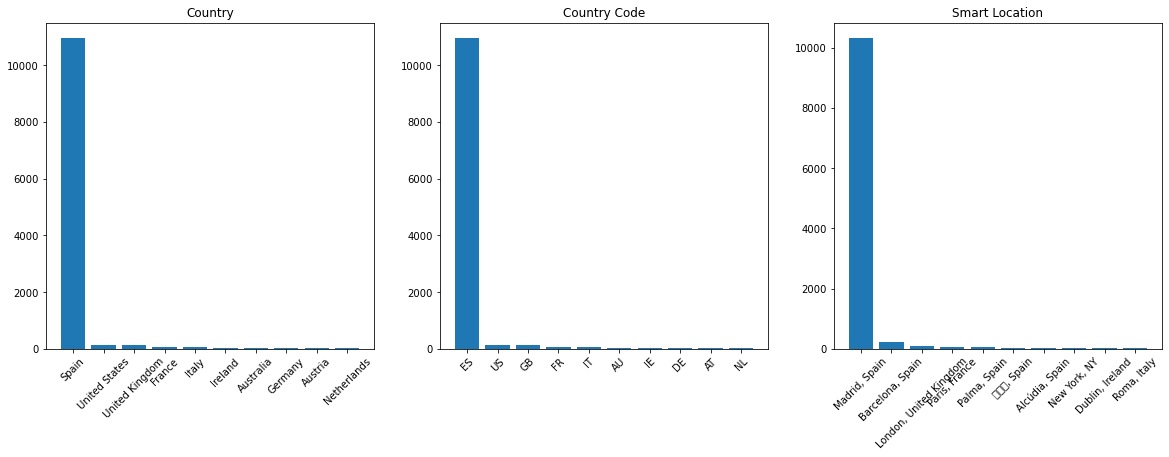

In [29]:
# Vamos a analizar nuestros datos de localización, empezamos por lo mas global, paises

# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 3, 1)
my_hist(train, 'Country')
fig.add_subplot(1, 3, 2)
my_hist(train, 'Country Code')
fig.add_subplot(1, 3, 3)
my_hist(train, 'Smart Location')

# Muestro en pantalla
plt.show()

In [30]:
# Podemos ver que la mayoría de los datos son de España, podemos quitar el resto de registros
p_c = train['Country'].describe()[3] / train['Country'].describe()[0] * 100
print("El {}% de los datos son {}, que es el valor con mayor frecuencia".format(p_c, train['Country'].describe()[2]))

El 94.8713506020965% de los datos son Spain, que es el valor con mayor frecuencia


In [31]:
# Me quedo con las de mayor frecuencia y elimino todas las características
train = train.loc[train['Country Code'] == 'ES']
train.drop(['Country', 'Country Code', 'Smart Location'], axis=1, inplace=True)

/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tonyzetag/anaconda3/envs/python_GPU_test/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 27835 missing from current font.
  fo

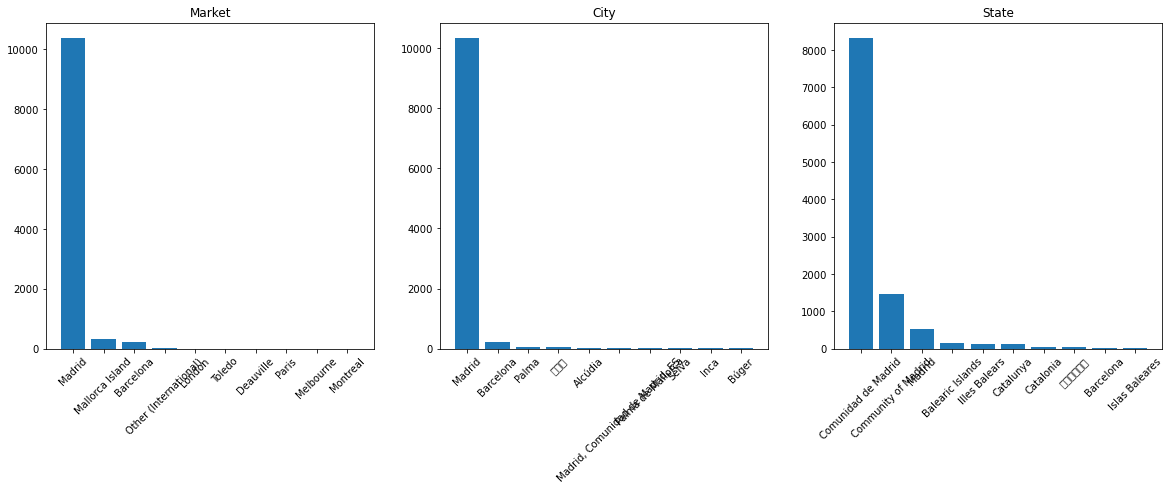

In [32]:
# El siguiente nivel a analizar sería a nivel nacional

# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 3, 1)
my_hist(train, 'Market')
fig.add_subplot(1, 3, 2)
my_hist(train, 'City')
fig.add_subplot(1, 3, 3)
my_hist(train, 'State')

# Muestro en pantalla
plt.show()

In [33]:
# Podemos ver que la mayoría de los datos son de Madrid, podemos quitar el resto de registros
p_c = train['City'].describe()[3] / train['City'].describe()[0] * 100
print("El {}% de los datos son {}, que es el valor con mayor frecuencia".format(p_c, train['City'].describe()[2]))

El 94.3008493926386% de los datos son Madrid, que es el valor con mayor frecuencia


In [34]:
# Me quedo con las de mayor frecuencia y elimino todas las características
train = train.loc[train['City'] == 'Madrid']
train.drop(['Market', 'City', 'State'], axis=1, inplace=True)

In [35]:
# Nota: 
#     En este caso, parecía haber algunos datos que podrían ser validos (como Comunidad de Madrid)
#     pero al ser estos un porcentaje tan pequeño se a optado por descartarlas directamente

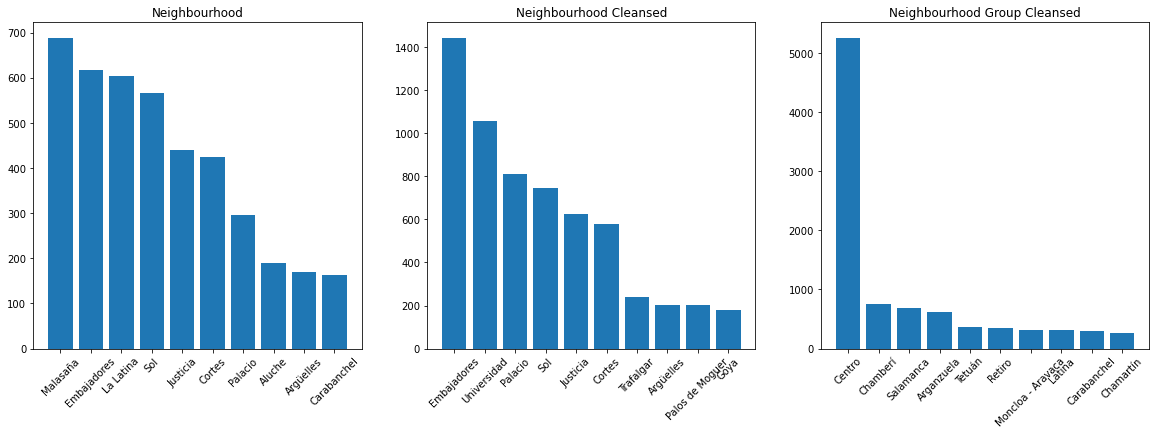

In [36]:
# El siguiente nivel a analizar sería a nivel de distrito o barrio

# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 3, 1)
my_hist(train, 'Neighbourhood')
fig.add_subplot(1, 3, 2)
my_hist(train, 'Neighbourhood Cleansed')
fig.add_subplot(1, 3, 3)
my_hist(train, 'Neighbourhood Group Cleansed')

# Muestro en pantalla
plt.show()

In [37]:
# Los datos están distribuidos de forma normal, entremos en más detalle

# Describe
train[['Neighbourhood','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']].describe()

Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed
count           6801                  10325                        10325
unique            65                    125                           21
top         Malasaña            Embajadores                       Centro
freq             688                   1443                         5255

In [38]:
# A la hora de hacer el modelo, sería inviable tantas variables, así que nos vamos a quedar con el que menos tiene
# Luego en el punto 3 se realizará alguna transformación para disminuir más la variable de dicha característica

# Por lo tanto nos quedamos con 'Neighbourhood Group Cleansed'
train.drop(['Neighbourhood', 'Neighbourhood Cleansed'], axis=1, inplace=True)

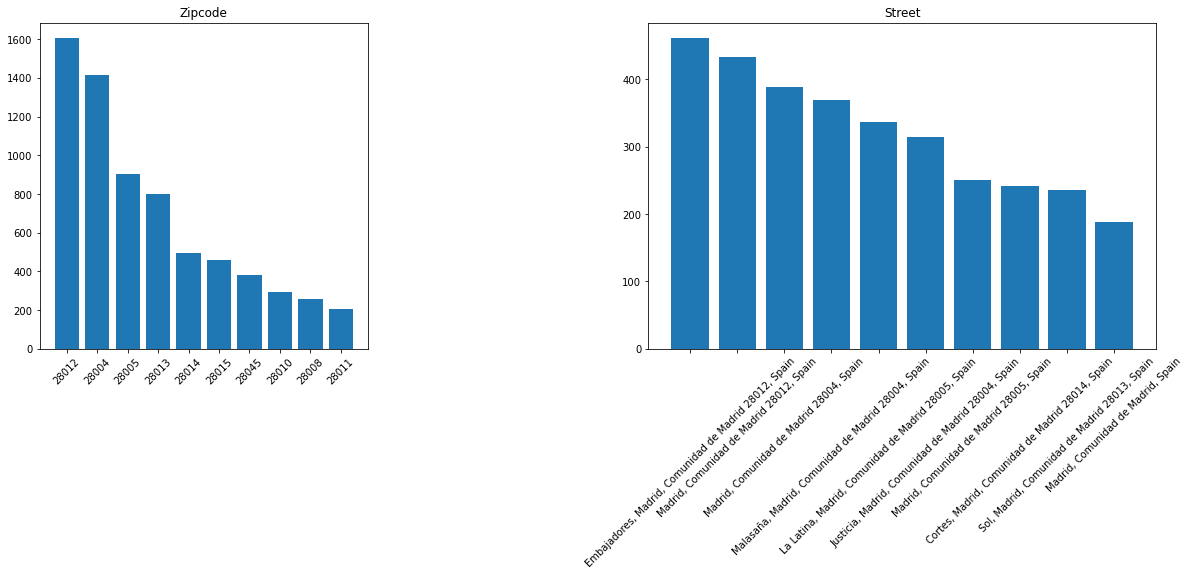

In [39]:
# El siguiente nivel a analizar sería a nivel de código postal y calle

# Tamaño de la figura
fig = plt.figure(figsize=(20,6))

# Subplots
fig.add_subplot(1, 3, 1)
my_hist(train, 'Zipcode')
fig.add_subplot(1, 2, 2)
my_hist(train, 'Street')

# Muestro en pantalla
plt.show()

In [40]:
# Los datos están distribuidos, entremos en más detalle

In [41]:
# Describe
train[['Zipcode','Street']].describe()

Zipcode                                             Street
count     9989                                              10325
unique      69                                                607
top      28012  Embajadores, Madrid, Comunidad de Madrid 28012...
freq      1605                                                461

In [42]:
# En este caso podemos ver que las variables son demasiado altas, 
# podemos descartar Street y quizás dejar Zipcode, para realizarle alguna transformación

# Eliminamos Street 
train.drop(['Street'], axis=1, inplace=True)

In [43]:
# Dado que, código postal debería ser de tipo numérico, en este caso parece que hay datos que no cumplen
# los cuáles hacen que se considere object dicha característica, vamos a limpiar dichos datos

# 1.- Los que no son números
c = [not str(row).isdigit() for row in train['Zipcode']]
train['Zipcode'][c] = np.nan
# 2.- rango válido
c = [not (float(row) >= 28000 and float(row) < 29000) for row in train['Zipcode']]
train['Zipcode'][c] = np.nan
# 3.- Arreglamos categories
train['Zipcode'] = train['Zipcode'].cat.remove_unused_categories()

# Nos queda lo siguiente
train['Zipcode'].describe()

count      9980
unique       60
top       28012
freq       1605
Name: Zipcode, dtype: object

In [44]:
# Se me ocurre que dado que tenemos datos de latitud y longitud, podriamos rellenar 
# los datos nulos e introducír el código postal, pero eso sería demasiado y no creo que valiera la pena

En cuanto a datos object (ni categóricos ni numéricos)

In [45]:
# Veamos Geolocation
train['Geolocation'].describe()

count                            10325
unique                           10325
top       40.4207760324,-3.69632481325
freq                                 1
Name: Geolocation, dtype: object

In [46]:
# Geolocation no es mas que una combinación en forma de tupla de Latitude y Longitude, así que lo eliminamos
train.drop(['Geolocation'], axis=1, inplace=True)

Una vez hemos examinado nuestros datos categóricos, vamos a codificarlos para poder usarlos, el método elegido es el Mean Encoder

In [47]:
categorical = train.dtypes[train.dtypes == 'category'].index

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    train[c] = data[c].map(mean)
    mean_map[c] = mean
    

train[categorical]

Host Response Time  Neighbourhood Group Cleansed    Zipcode  \
ID                                                                      
13556608           73.564502                     72.778516  73.566278   
14080072           75.425792                     44.456311  39.258065   
17646520                 NaN                     72.778516  67.055206   
7590341            73.237282                     72.778516  73.566278   
3244300            73.564502                     46.453972  45.704000   
...                      ...                           ...        ...   
13541091           75.425792                     72.778516  83.401264   
9620796            73.237282                     84.242762  65.480712   
14280234           73.564502                     72.778516  67.762144   
8082376                  NaN                     36.738739  42.329114   
16419818           73.564502                     72.778516  67.055206   

          Property Type  Room Type  
ID                                  
13556608      72.081995  95.171075  
14080072      72.081995  95.171075  
17646520      72.081995  40.541570  
7590341       72.081995  95.171075  
3244300       72.081995  40.541570  
...                 ...        ...  
13541091      72.081995  40.541570  
9620796       72.081995  95.171075  
14280234      72.081995  40.541570  
8082376       78.491803  40.541570  
16419818      72.081995  95.171075  

[10325 rows x 5 columns]

Analizemos ahora los datos numéricos

* Preparación para diagramas de dispersión

In [48]:
# diagrama de dispersión, para análisis de variables numéricas
def scatter_feature_vs_target_feature(df, feature, target, color=None):
    plt.scatter(x=df[feature].values, y=df[target][df.index.values], c=color)
    plt.title (str(feature + ' - ' + target))

* Datos numéricos de Host

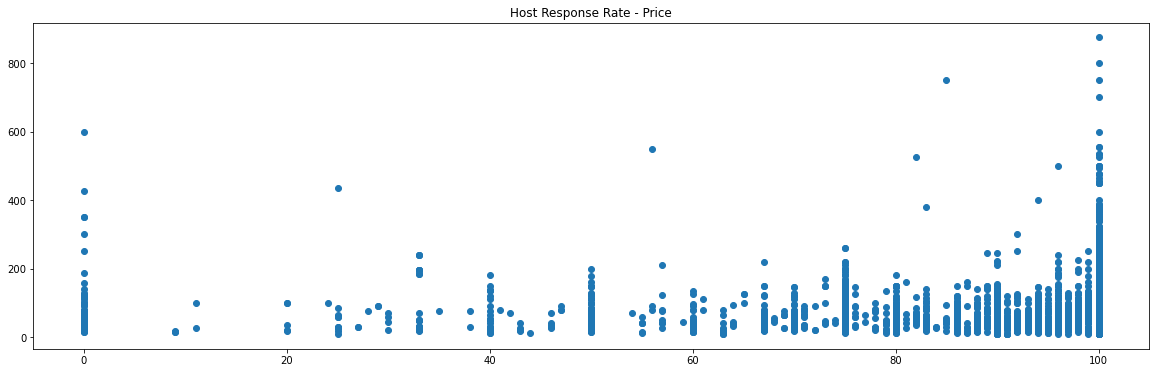

In [49]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train, 'Host Response Rate', 'Price')

# Muestro en pantalla
plt.show()

In [50]:
# Se observa una tendencia ascendente, no se observa outliers claros, aunque si algunos datos dispersos

* Datos numéricos geográficos

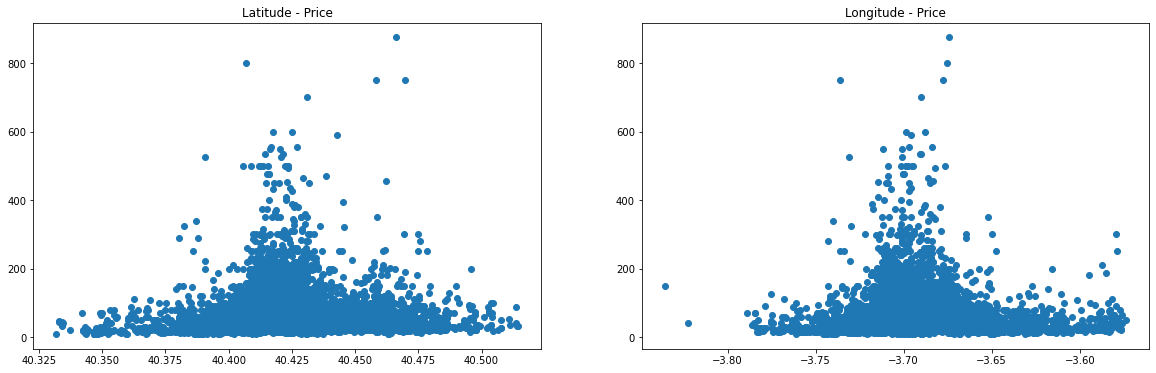

In [51]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 2, 1)
scatter_feature_vs_target_feature(train, 'Latitude', 'Price')
plt.subplot(1, 2, 2)
scatter_feature_vs_target_feature(train, 'Longitude', 'Price')

# Muestro en pantalla
plt.show()

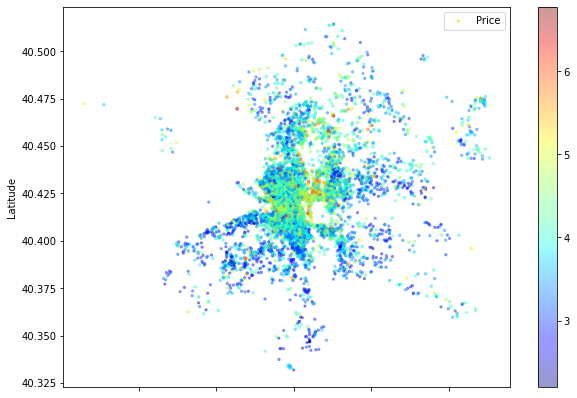

In [52]:
train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=np.log(train["Price"]*10), label="Price", figsize=(10,7),
    c=np.log(train["Price"]), cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [53]:
# Se observa una tendencia a precios altos en el centro

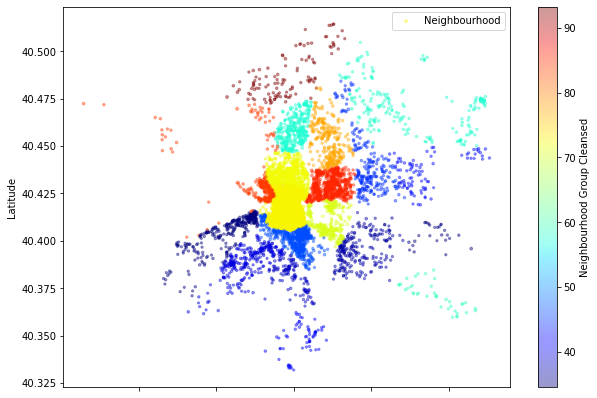

In [54]:
train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=np.log(train["Price"]*10), label="Neighbourhood", figsize=(10,7),
    c='Neighbourhood Group Cleansed', cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [55]:
# Se podría clusterizar, pero para ello ya tenemos la característica Neighbourhood Group Cleansed 
# que en principio parece que se adapta bien a los precos

* Datos numéricos dentro de los inmuebles (Bathrooms, Bedrooms, Beds)

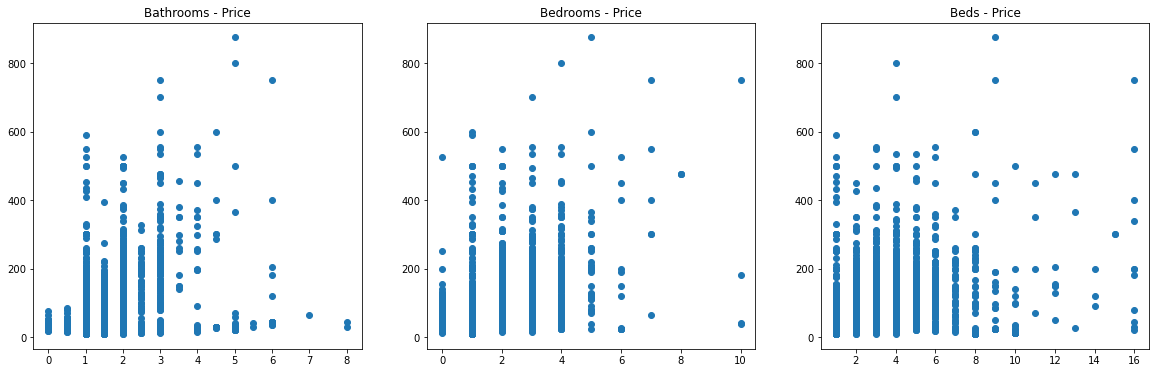

In [56]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 3, 1)
scatter_feature_vs_target_feature(train, 'Bathrooms', 'Price')
plt.subplot(1, 3, 2)
scatter_feature_vs_target_feature(train, 'Bedrooms', 'Price')
plt.subplot(1, 3, 3)
scatter_feature_vs_target_feature(train, 'Beds', 'Price')

# Muestro en pantalla
plt.show()

In [57]:
# Observable ligera tendencia ascendente, sin embargo no tanto para Beds (a partir de 4 o 5 camas parece que el precio desciende)

* Datos numéricos de personas

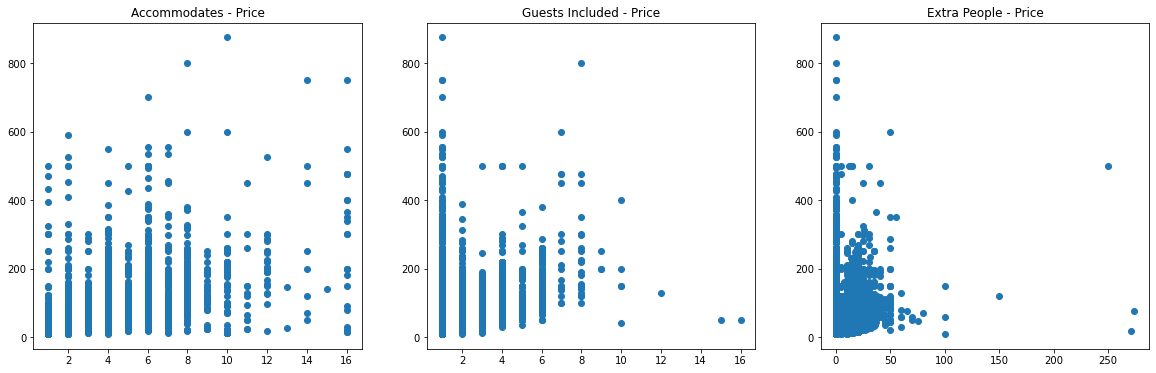

In [58]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 3, 1)
scatter_feature_vs_target_feature(train, 'Accommodates', 'Price')
plt.subplot(1, 3, 2)
scatter_feature_vs_target_feature(train, 'Guests Included', 'Price')
plt.subplot(1, 3, 3)
scatter_feature_vs_target_feature(train, 'Extra People', 'Price')

# Muestro en pantalla
plt.show()

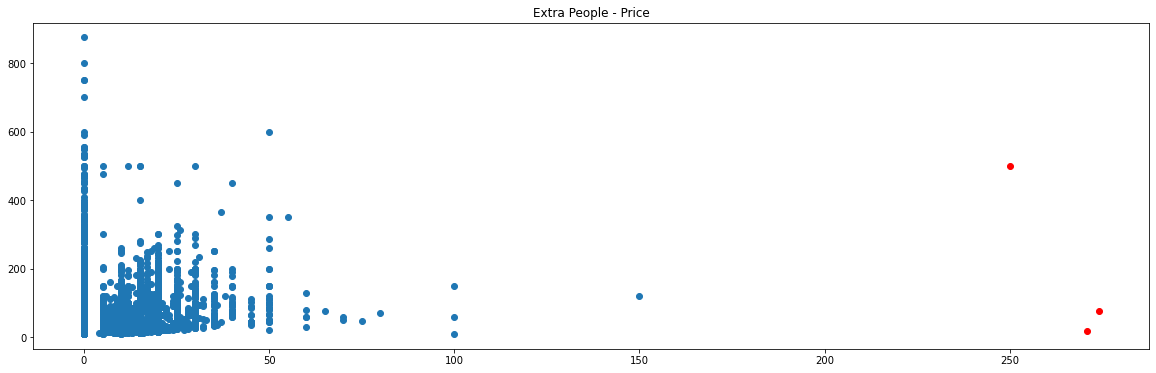

In [59]:
# En este caso, en Extra People, parece que hay 3 muestras extrañas, que podrían considerarse outliers (o bien naves o mansiones)
# podriamos quitarlas sin problemas.

# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train[train['Extra People'] < 200], 'Extra People', 'Price')
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train[train['Extra People'] > 200], 'Extra People', 'Price', color='red')

# Elimino posibles outliers
train.loc[train['Extra People'] > 200] = np.nan

# Muestro en pantalla
plt.show()

In [60]:
# En este caso, en Extra People, parece que hay 3 muestras extrañas, que podrían considerarse outliers (o bien naves o mansiones)
#  podriamos quitarlas sin problemas.
# Nota:
#    Pensé en poner los datos de 0 en NaN, pero no creo que sea realista, 
#    porque creo que los datos pueden ser ciertos y en muchos no permitan gente extra

* Datos de número de noches

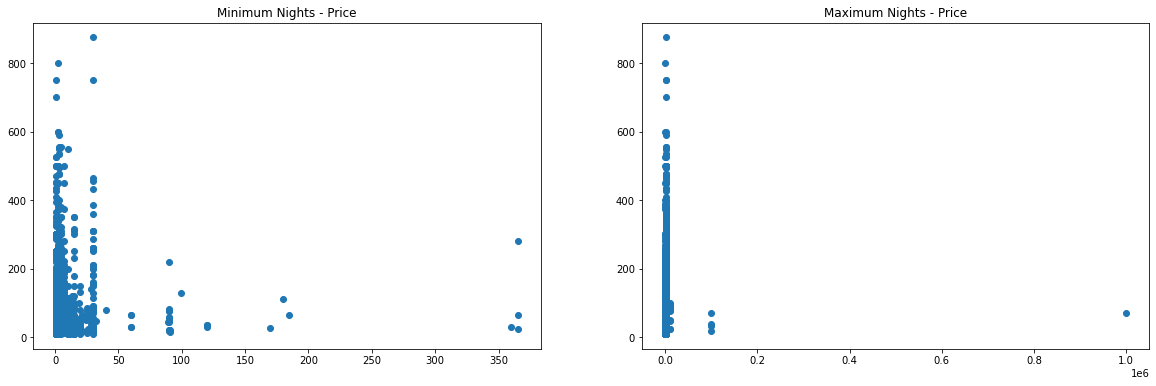

In [61]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 2, 1)
scatter_feature_vs_target_feature(train, 'Minimum Nights', 'Price')
plt.subplot(1, 2, 2)
scatter_feature_vs_target_feature(train, 'Maximum Nights', 'Price')

# Muestro en pantalla
plt.show()

In [62]:
# No parece que el número de noches afecte en el precio, además tiene una variabilidad alta y outliers, 
# opto por quitar dichas características
train.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)

* Datos númericos de disponibilidad

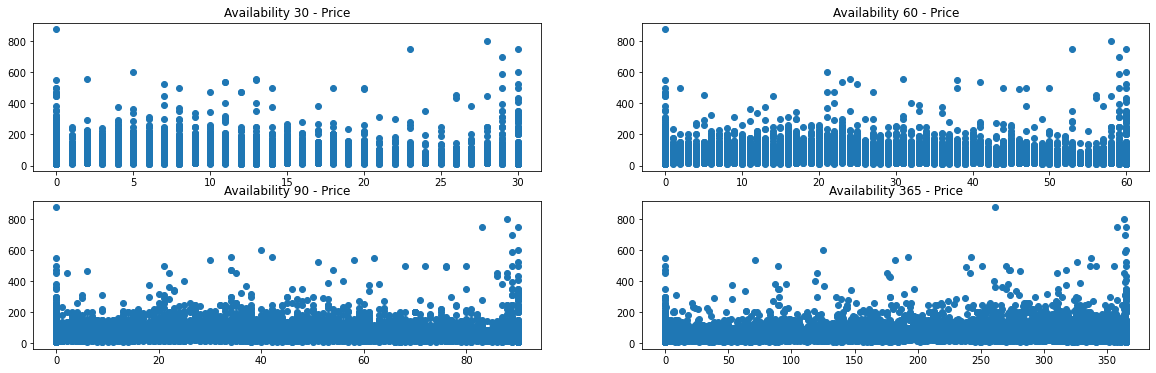

In [63]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(2, 2, 1)
scatter_feature_vs_target_feature(train, 'Availability 30', 'Price')
plt.subplot(2, 2, 2)
scatter_feature_vs_target_feature(train, 'Availability 60', 'Price')
plt.subplot(2, 2, 3)
scatter_feature_vs_target_feature(train, 'Availability 90', 'Price')
plt.subplot(2, 2, 4)
scatter_feature_vs_target_feature(train, 'Availability 365', 'Price')

# Muestro en pantalla
plt.show()

In [64]:
# No parece haber outliers, tampoco parece que vaya a ver tendencia

* Datos numéricos de Reviews

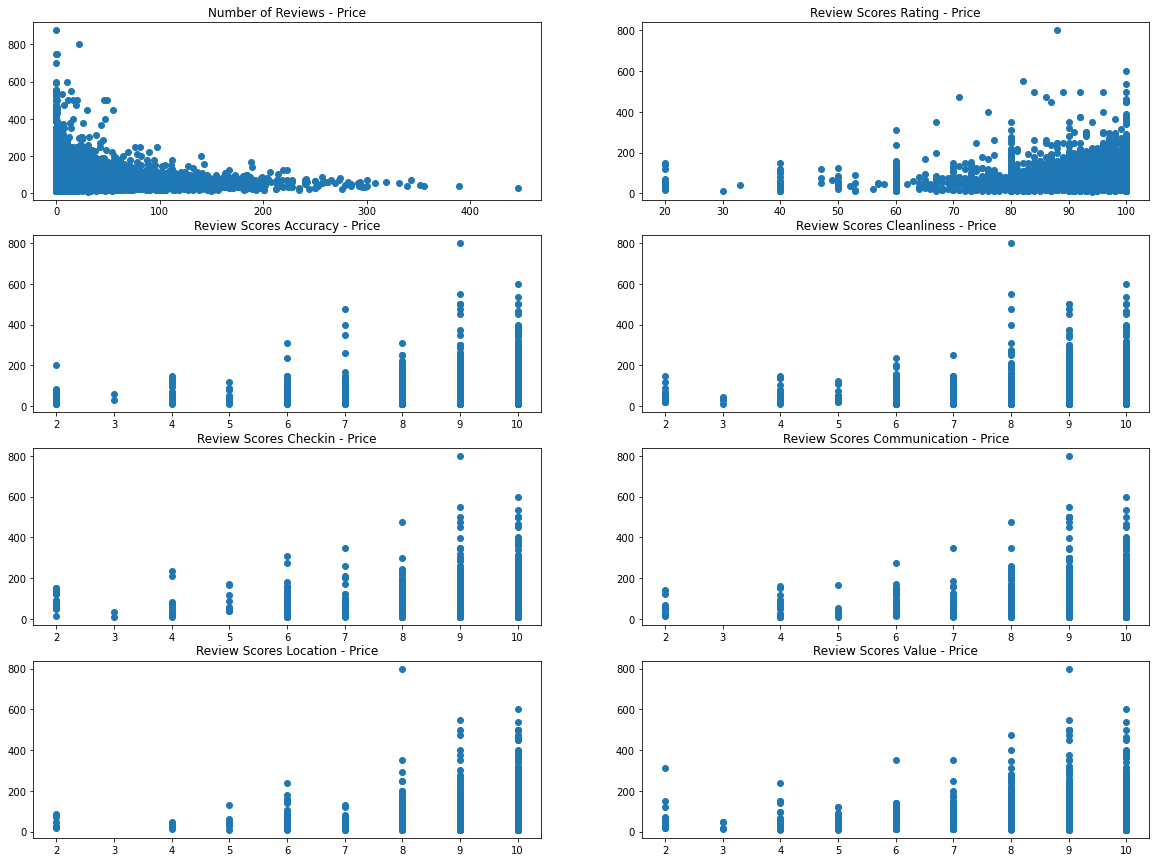

In [65]:
# Tamaño de la figura
plt.figure(figsize=(20,15))

# Subplots
plt.subplot(4, 2, 1)
scatter_feature_vs_target_feature(train, 'Number of Reviews', 'Price')
plt.subplot(4, 2, 2)
scatter_feature_vs_target_feature(train, 'Review Scores Rating', 'Price')
plt.subplot(4, 2, 3)
scatter_feature_vs_target_feature(train, 'Review Scores Accuracy', 'Price')
plt.subplot(4, 2, 4)
scatter_feature_vs_target_feature(train, 'Review Scores Cleanliness', 'Price')
plt.subplot(4, 2, 5)
scatter_feature_vs_target_feature(train, 'Review Scores Checkin', 'Price')
plt.subplot(4, 2, 6)
scatter_feature_vs_target_feature(train, 'Review Scores Communication', 'Price')
plt.subplot(4, 2, 7)
scatter_feature_vs_target_feature(train, 'Review Scores Location', 'Price')
plt.subplot(4, 2, 8)
scatter_feature_vs_target_feature(train, 'Review Scores Value', 'Price')

# Muestro en pantalla
plt.show()

In [66]:
# No parece haber outliers, aunque si parece haber tendencia

# En Review Scores Rating, claramente se mezclan datos redondeados 
# con datos continuos, no sé si sería buena idea redondear todos los datos
# imagino que se perdería información, así que no voy a meterle mano

* Datos numéricos de medida

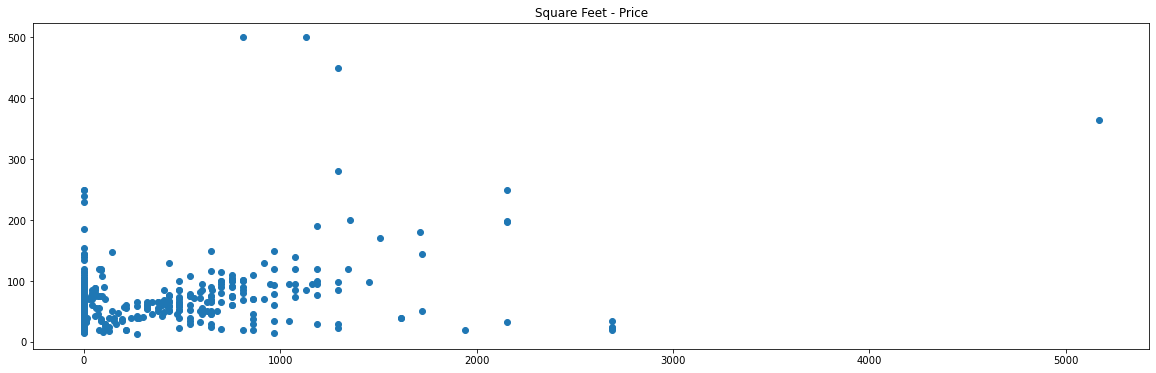

In [67]:
# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train, 'Square Feet', 'Price')

# Muestro en pantalla
plt.show()

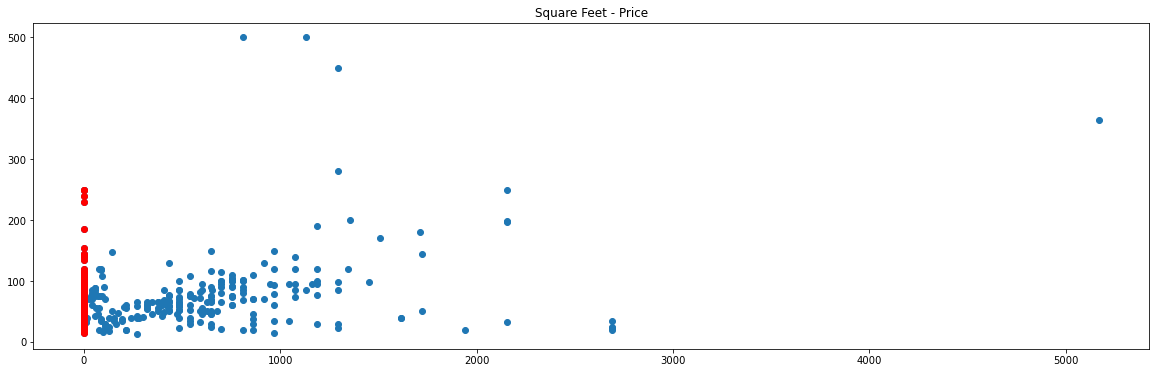

In [68]:
# Podemos encontrar problemas en esta característica, ya que no tiene sentido físico que haya estancias de 0F2
# Se va a considerar como outliers, dado que parece una variable con correlación alta, vamos a estipular los datos faltantes (punto 3)

# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train, 'Square Feet', 'Price')
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train[train['Square Feet'] < 1], 'Square Feet', 'Price', color='red')

# Elimino posibles outliers
train.loc[train['Square Feet'] < 1] = np.nan

# Muestro en pantalla
plt.show()

In [69]:
# La situación actual
print("Tenemos {} filas y {} columnas".format(train.shape[0], train.shape[1]))

Tenemos 10325 filas y 32 columnas


### 2.2.- Matriz de correlación 

In [70]:
# La correlación nos dice mediante matriz, si existe relación entre pares de características normalizadas entre -1 a 1
train.corr()

Price  Host Response Time  \
Price                           1.000000           -0.050098   
Host Response Time             -0.050098            1.000000   
Host Response Rate              0.000460           -0.510363   
Neighbourhood Group Cleansed    0.231591           -0.041718   
Zipcode                         0.278992           -0.032897   
Latitude                        0.065178            0.028415   
Longitude                      -0.024770            0.011302   
Property Type                   0.050269            0.001000   
Room Type                       0.469193           -0.097062   
Accommodates                    0.573830           -0.086165   
Bathrooms                       0.343605            0.014361   
Bedrooms                        0.518861           -0.025099   
Beds                            0.476939           -0.066403   
Square Feet                     0.359691            0.034253   
Security Deposit                0.348264            0.023324   
Cleaning Fee                    0.666739           -0.071963   
Guests Included                 0.356465           -0.083598   
Extra People                    0.104413           -0.059593   
Availability 30                 0.018011            0.108651   
Availability 60                 0.005898            0.092043   
Availability 90                -0.011931            0.081629   
Availability 365                0.076064            0.013347   
Number of Reviews              -0.034683           -0.119838   
Review Scores Rating            0.063387           -0.032726   
Review Scores Accuracy          0.062326           -0.034221   
Review Scores Cleanliness       0.085943           -0.082680   
Review Scores Checkin          -0.010913           -0.023640   
Review Scores Communication     0.006136           -0.028885   
Review Scores Location          0.151995           -0.025759   
Review Scores Value             0.025076           -0.033208   
Calculated host listings count  0.165703           -0.126239   
Reviews per Month              -0.063160           -0.177909   

                                Host Response Rate  \
Price                                     0.000460   
Host Response Time                       -0.510363   
Host Response Rate                        1.000000   
Neighbourhood Group Cleansed              0.038934   
Zipcode                                   0.018633   
Latitude                                 -0.030742   
Longitude                                -0.025078   
Property Type                             0.000472   
Room Type                                 0.086929   
Accommodates                              0.065067   
Bathrooms                                -0.033684   
Bedrooms                                  0.006983   
Beds                                      0.032177   
Square Feet                               0.111685   
Security Deposit                         -0.022247   
Cleaning Fee                              0.023839   
Guests Included                           0.062886   
Extra People                              0.055711   
Availability 30                          -0.148802   
Availability 60                          -0.126229   
Availability 90                          -0.114912   
Availability 365                         -0.042472   
Number of Reviews                         0.135708   
Review Scores Rating                      0.094443   
Review Scores Accuracy                    0.086489   
Review Scores Cleanliness                 0.102683   
Review Scores Checkin                     0.104338   
Review Scores Communication               0.087995   
Review Scores Location                    0.058926   
Review Scores Value                       0.099185   
Calculated host listings count           -0.057805   
Reviews per Month                         0.187706   

                                Neighbourhood Group Cleansed   Zipcode  \
Price                                               0.231591  0.2

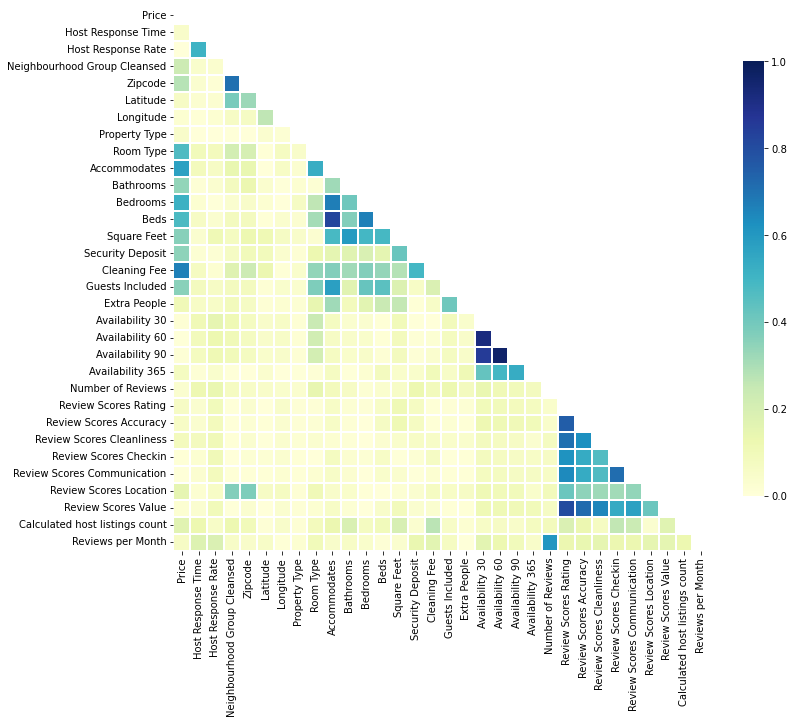

In [71]:
# Compute the correlation matrix
train = train
corr = np.abs(train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

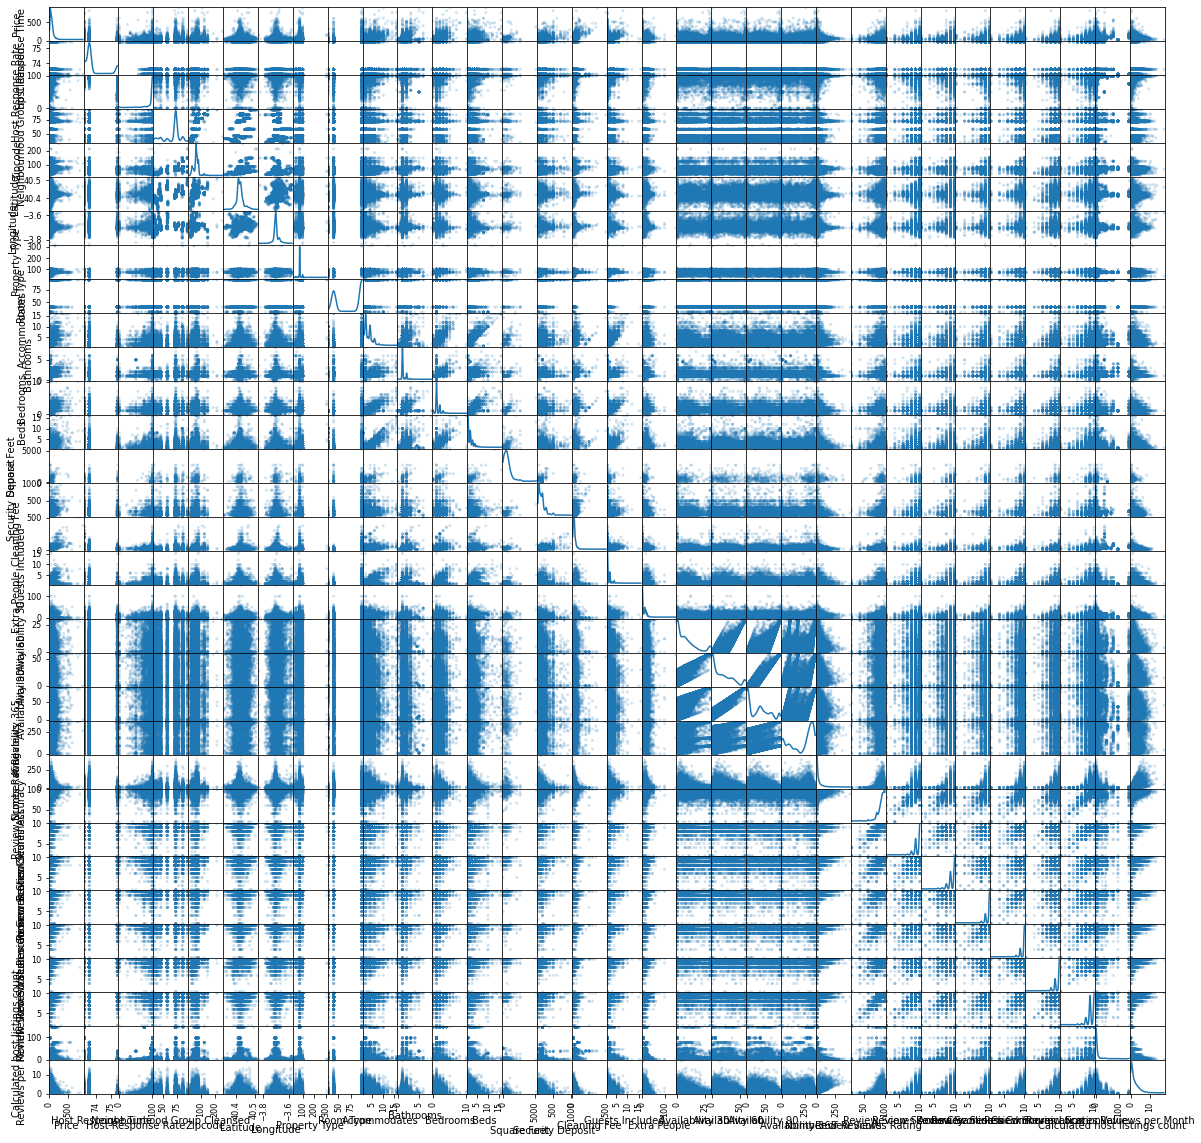

In [72]:
pd.plotting.scatter_matrix(
    train, 
    alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## 3.- Preprocesamiento

* Normalización, Reducción de dimensionalidad, Combinación de variables

Podemos ver en nuestra matriz como el histograma de distintas características no sigue una escala lineal, vamos a transformarlo, ya que será de ayuda

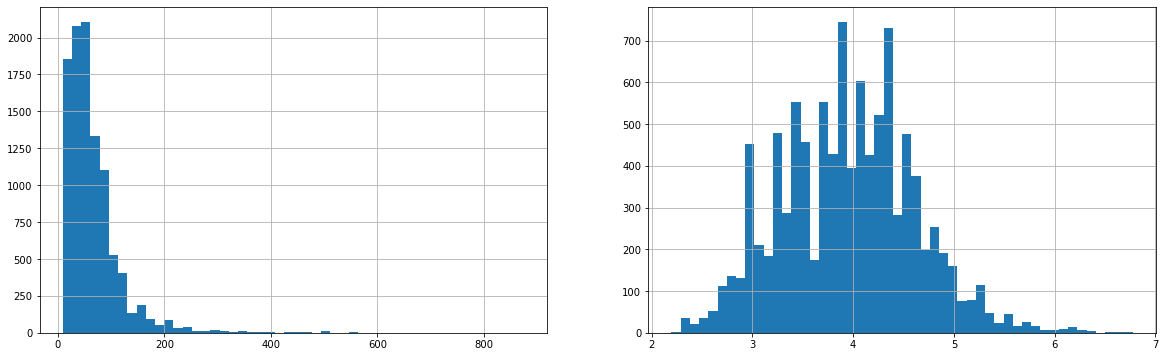

In [73]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
train['Price'].hist(bins=50)
plt.subplot(1,2,2)
np.log(train['Price']).hist(bins=50)
train['Price'] = np.log(train['Price'])

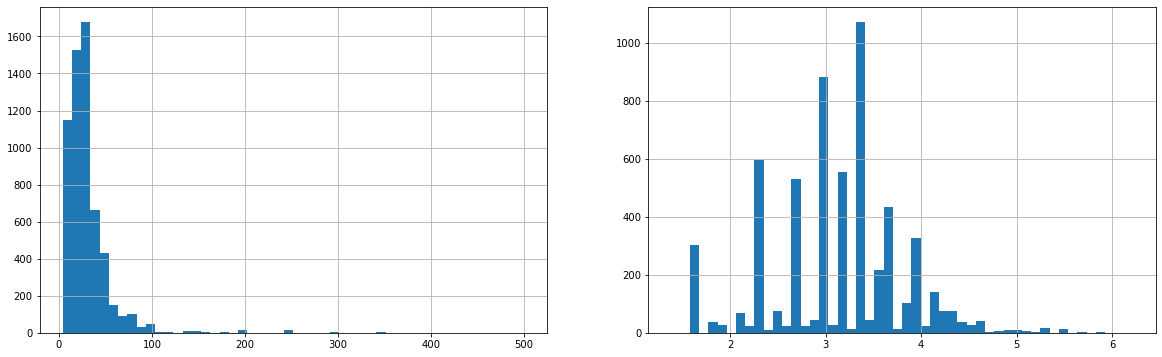

In [74]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
train['Cleaning Fee'].hist(bins=50)
plt.subplot(1,2,2)
np.log(train['Cleaning Fee']).hist(bins=50)
train['Cleaning Fee'] = np.log(train['Cleaning Fee'])

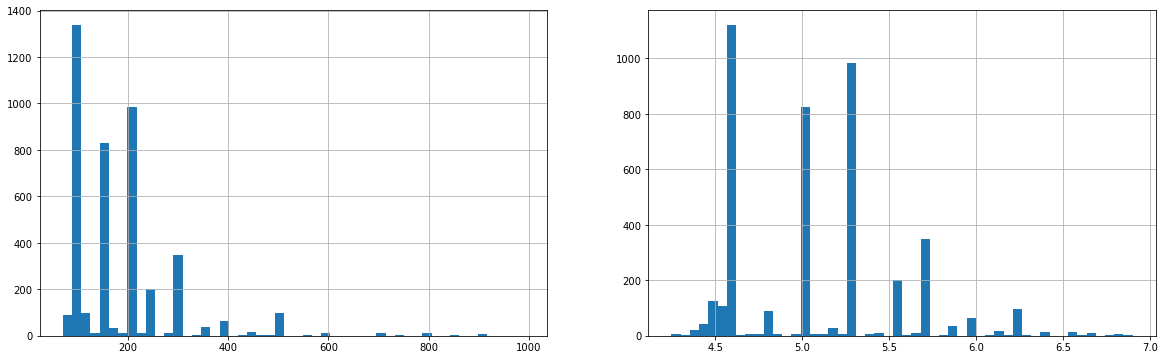

In [75]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
train['Security Deposit'].hist(bins=50)
plt.subplot(1,2,2)
np.log(train['Security Deposit']).hist(bins=50)
train['Security Deposit'] = np.log(train['Security Deposit'])

### 3.1 Rellenando valores

In [76]:
# Vamos a hacer un modelo de regresión para rellenar los valores nulos de 'Square Feet'

# Podriamos ver la Correlación para buscar las características mas significativas
# pero por usar otro método vamos a ver mediante f regression y mutual info
# simplemente por comparar y ver como funciona (además de cumplir el objetivo)

* Selección de características (f_regression y mutual_info_regression)

In [77]:
# Datos
data = train.dropna()
X = data.drop(['Square Feet'], axis=1).select_dtypes(include='number')
y = data['Square Feet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = seed)
featureNames = X.columns.values

In [78]:
# f-Test
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

# Mutual Info
mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

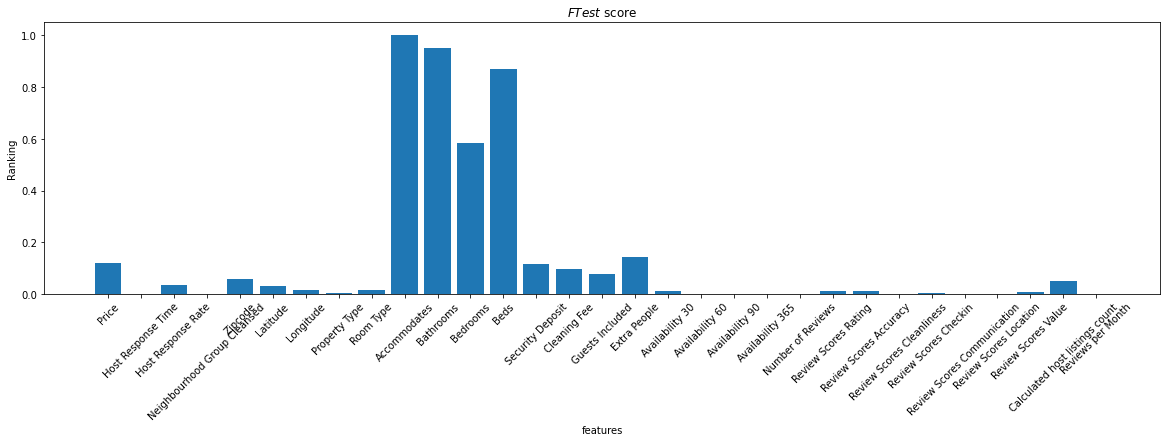

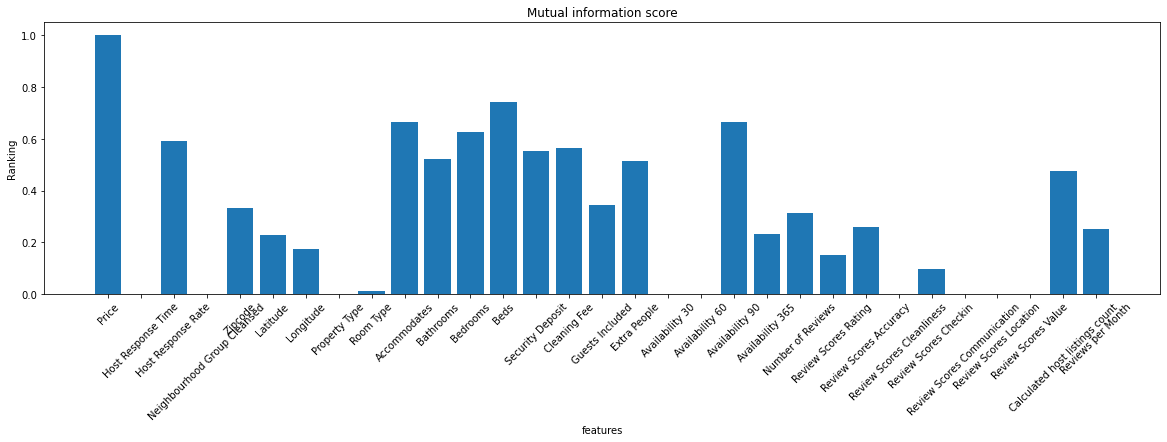

In [79]:
# F-Test
plt.figure(figsize=(20, 5))

plt.bar(range(X.shape[1]), f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

# Mutual Info
plt.figure(figsize=(20, 5))

plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [80]:
# Mismo criterio de selección (para los 2 seleccionar los 5 mejores)

n_cols = 5

# F-Test
sel_five_cols = SelectKBest(f_regression, k=n_cols)
sel_five_cols.fit(X_train, y_train)
f_test_features = featureNames[sel_five_cols.get_support()]

# Mutual-Test
sel_five_cols = SelectKBest(mutual_info_regression, k=n_cols)
sel_five_cols.fit(X_train, y_train)
mi_features = featureNames[sel_five_cols.get_support()]

In [81]:
print("f-test: {}".format(f_test_features))
print("m-test: {}".format(mi_features))

f-test: ['Accommodates' 'Bathrooms' 'Bedrooms' 'Beds' 'Extra People']
m-test: ['Price' 'Accommodates' 'Bathrooms' 'Bedrooms' 'Cleaning Fee']


In [82]:
# Comprobemos como se comportan, por ejemplo con regresión lineal + regularización elasticnet(w1*lasso + [1-w1]*ridge)

# Modelos
model = ElasticNet()
model_f = ElasticNet()
model_m = ElasticNet()

# Define grid
param_grid = dict()
param_grid['alpha'] = np.logspace(-3, 0, 20)
param_grid['l1_ratio'] = np.logspace(-3, 0, 20)
param_grid['random_state'] = [seed]

# define search
grid = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)
grid_f = GridSearchCV(model_f, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)
grid_m = GridSearchCV(model_m, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)

# Fit
grid.fit(X_train, y_train)
grid_f.fit(X_train[f_test_features], y_train)
grid_m.fit(X_train[mi_features], y_train)

# Predict
y_hat = grid.predict(X_test)
y_hat_f = grid_f.predict(X_test[f_test_features])
y_hat_m = grid_m.predict(X_test[mi_features])

print('Todos los datos: {}'.format(mean_squared_error(y_test, y_hat)))
print('F-test: {}'.format(mean_squared_error(y_test, y_hat_f)))
print('Mutual Information: {}'.format(mean_squared_error(y_test, y_hat_m)))

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Todos los datos: 398548.6132683833
F-test: 291427.3225554246
Mutual Information: 323616.4996849126


In [83]:
best_model = grid_f.best_estimator_
print("mejor modelo: {} ".format(best_model))
scores = -1*np.array(grid_f.cv_results_['mean_test_score'])

mejor modelo: ElasticNet(l1_ratio=1.0, random_state=9876) 


In [84]:
# Podemos ver como en este caso, f-test se comportó mejor que Mutual Info

In [85]:
train[~train.index.isin(train.loc[X.index.values])]

Price  Host Response Time  Host Response Rate  \
ID                                                           
13556608  5.407172           73.564502               100.0   
14080072  3.988984           75.425792               100.0   
17646520  3.761200                 NaN                 NaN   
7590341   4.219508           73.237282               100.0   
3244300   2.995732           73.564502               100.0   
...            ...                 ...                 ...   
13541091  3.806662           75.425792                80.0   
9620796   4.941642           73.237282               100.0   
14280234  2.995732           73.564502               100.0   
8082376   3.091042                 NaN                 NaN   
16419818  4.248495           73.564502               100.0   

          Neighbourhood Group Cleansed    Zipcode   Latitude  Longitude  \
ID                                                                        
13556608                     72.778516  73.566278  40.420776  -3.696325   
14080072                     44.456311  39.258065  40.438544  -3.636029   
17646520                     72.778516  67.055206  40.408827  -3.700614   
7590341                      72.778516  73.566278  40.424608  -3.692368   
3244300                      46.453972  45.704000  40.400076  -3.695290   
...                                ...        ...        ...        ...   
13541091                     72.778516  83.401264  40.410945  -3.694472   
9620796                      84.242762  65.480712  40.432735  -3.722019   
14280234                     72.778516  67.762144  40.412013  -3.706706   
8082376                      36.738739  42.329114  40.396743  -3.659005   
16419818                     72.778516  67.055206  40.411299  -3.701760   

          Property Type  Room Type  Accommodates  ...  Number of Reviews  \
ID                                                ...                      
13556608      72.081995  95.171075           6.0  ...               30.0   
14080072      72.081995  95.171075           4.0  ...                0.0   
17646520      72.081995  40.541570           1.0  ...                0.0   
7590341       72.081995  95.171075           3.0  ...               82.0   
3244300       72.081995  40.541570           1.0  ...               46.0   
...                 ...        ...           ...  ...                ...   
13541091      72.081995  40.541570           2.0  ...                3.0   
9620796       72.081995  95.171075           4.0  ...                2.0   
14280234      72.081995  40.541570           1.0  ...               49.0   
8082376       78.491803  40.541570           1.0  ...                5.0   
16419818      72.081995  95.171075           4.0  ...                0.0   

          Review Scores Rating  Review Scores Accuracy  \
ID                                                       
13556608                  88.0                    10.0   
14080072                   NaN                     NaN   
17646520                   NaN                     NaN   
7590341                   98.0                    10.0   
3244300                   90.0                     9.0   
...                        ...                     ...   
13541091                  87.0                     9.0   
9620796                   80.0                     8.0   
14280234                  91.0                     9.0   
8082376                  100.0                    10.0   
16419818                   NaN                     NaN   

          Review Scores Cleanliness  Review Scores Checkin  \
ID                                                           
13556608                        9.0                    9.0   
14080072                        NaN                    NaN   
17646520                        NaN                    NaN   
7590341                        10.0                   10.0   
3244300                         9.0                   10.0   
...                             ...                 

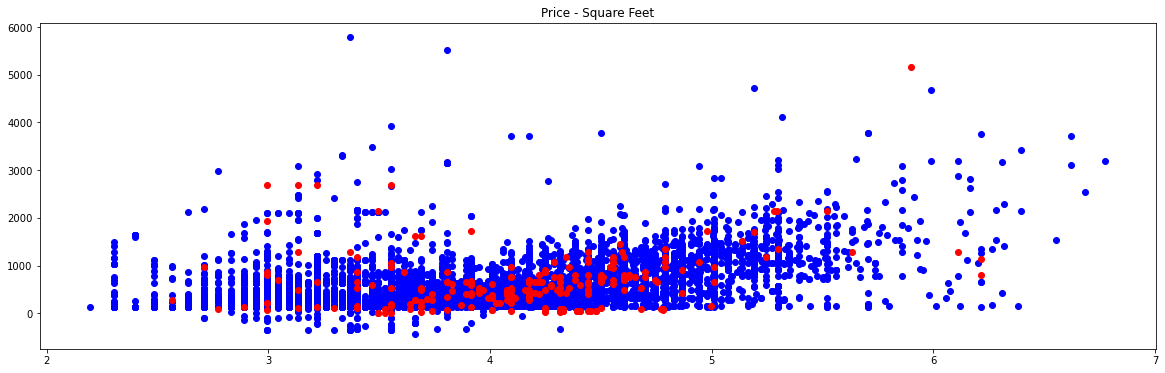

In [86]:
# Pues ahora solo queda rellenar los valores
X = train[train['Square Feet'].isna()][f_test_features].dropna()
y_hat = grid_f.predict(X[f_test_features])
train.loc[X.index.values,'Square Feet'] = y_hat

# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train[train.index.isin(X.index)], 'Price', 'Square Feet', color='blue')
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(train[~train.index.isin(X.index)], 'Price', 'Square Feet', color='red')

In [87]:
# Podemos comprobar mediante visualización que se comporta de forma viable, pero también predice valores negativos, 
# lo cual es un problema, haremos comparación en el modelo final incluyendo o no esta característica

### 3.2 Combinación de variables, Reducción de dimensionalidad y otras transformaciones

* Pies Cuadrados a Metros Cuadrados

In [88]:
# Las siguientes transformaciones, van a ser mediante funciones para así poder realizarlas en el set de test a posteriori

In [89]:
# Función para pasar de pies2 a metros2
def feet_to_meters(df):
    feet_to_m2 = 0.09290304
    df['Square Meters'] = df['Square Feet'].apply(lambda x: x * feet_to_m2)
    df = df.drop('Square Feet', axis=1)
    return df
# Nota:
    # Lo hubiera hecho antes de analizar visualmente, pero en este caso pensé
    # que mejor lo dejo mas adelante, por simple tema de ordenamiento

In [90]:
# Pies cuadrados a Metros cuadrados (Y hacemos drop de Feet, ya que no nos aportan información nueva)
train = feet_to_meters(train)

* Barrios / Distritos vs Código Postal

In [91]:
# Estas 2 variables están bastante correladas como pudimos ver en la matriz de correlación
train[['Price', 'Neighbourhood Group Cleansed', 'Zipcode']].corr()

Price  Neighbourhood Group Cleansed   Zipcode
Price                         1.000000                      0.328550  0.347657
Neighbourhood Group Cleansed  0.328550                      1.000000  0.704498
Zipcode                       0.347657                      0.704498  1.000000

In [92]:
# Parece que Zipcode está un poco mas correlada con Price, sin embargo esta viene de una característica con muchos más valores únicos
# Por lo que me quedo mejor con Neighbourhood Group Cleansed
print(mean_map['Neighbourhood Group Cleansed'].size)
print(mean_map['Zipcode'].size)

49
619


In [93]:
train.drop('Zipcode', axis=1, inplace=True)

* Availability 

In [94]:
train[['Price', 'Availability 30', 'Availability 60', 'Availability 90']].corr()

Price  Availability 30  Availability 60  Availability 90
Price            1.000000        -0.046609        -0.047909        -0.058349
Availability 30 -0.046609         1.000000         0.921612         0.852305
Availability 60 -0.047909         0.921612         1.000000         0.964180
Availability 90 -0.058349         0.852305         0.964180         1.000000

In [95]:
# Las disponibilidades están fuertemente correlacionadas entre ellas, sin embargo dado que con respecto a Price
# tiene una correlación tan cercanas a 1, opto por quitarlas 
train.drop(['Availability 30', 'Availability 60', 'Availability 90'], axis=1, inplace=True)

* reviews

In [96]:
cols = [col for col in train.columns if 'review' in str.lower(col)]
cols.insert(0, 'Price')
abs(train[cols].corr())

Price  Number of Reviews  \
Price                        1.000000           0.028176   
Number of Reviews            0.028176           1.000000   
Review Scores Rating         0.075513           0.043918   
Review Scores Accuracy       0.081477           0.046709   
Review Scores Cleanliness    0.110809           0.075655   
Review Scores Checkin        0.020580           0.063546   
Review Scores Communication  0.039171           0.060060   
Review Scores Location       0.212092           0.092038   
Review Scores Value          0.035578           0.067326   
Reviews per Month            0.017036           0.606216   

                             Review Scores Rating  Review Scores Accuracy  \
Price                                    0.075513                0.081477   
Number of Reviews                        0.043918                0.046709   
Review Scores Rating                     1.000000                0.753083   
Review Scores Accuracy                   0.753083                1.000000   
Review Scores Cleanliness                0.704745                0.627483   
Review Scores Checkin                    0.619356                0.535977   
Review Scores Communication              0.644166                0.538877   
Review Scores Location                   0.415347                0.349366   
Review Scores Value                      0.807706                0.718718   
Reviews per Month                        0.131396                0.140224   

                             Review Scores Cleanliness  Review Scores Checkin  \
Price                                         0.110809               0.020580   
Number of Reviews                             0.075655               0.063546   
Review Scores Rating                          0.704745               0.619356   
Review Scores Accuracy                        0.627483               0.535977   
Review Scores Cleanliness                     1.000000               0.466790   
Review Scores Checkin                         0.466790               1.000000   
Review Scores Communication                   0.469068               0.711840   
Review Scores Location                        0.323419               0.314467   
Review Scores Value                           0.650574               0.539506   
Reviews per Month                             0.150900               0.132276   

                             Review Scores Communication  \
Price                                           0.039171   
Number of Reviews                               0.060060   
Review Scores Rating                            0.644166   
Review Scores Accuracy                          0.538877   
Review Scores Cleanliness                       0.469068   
Review Scores Checkin                           0.711840   
Review Scores Communication                     1.000000   
Review Scores Location                          0.343408   
Review Scores Value                             0.571770   
Reviews per Month                               0.128980   

                             Review Scores Location  Review Scores Value  \
Price                                      0.212092             0.035578   
Number of Reviews                          0.092038             0.067326   
Review Scores Rating                       0.415347             0.807706   
Review Scores Accuracy                     0.349366             0.718718   
Review Scores Cleanliness                  0.323419             0.650574   
Review Scores Checkin                      0.314467             0.539506   
Review Scores Communication                0.343408             0.571770   
Review Scores Location                     1.000000             0.416534   
Review Scores Value                        0.416534             1.000000   
Reviews per Month                          0.150176             0.156208   

                             Reviews per Month  
Price                                 0.017036  
Number of Reviews                  

In [97]:
# La mayoría de características reviews, están correladas entre si, pero solo Review Scores Location pasa del 0.1 con respecto a Price
# Así que nos quedamos esta característica y dropeamos las demás
cols.remove('Price')
cols.remove('Review Scores Location')
train.drop(cols, axis=1, inplace=True)

In [98]:
# La situación actual
print("Tenemos {} filas y {} columnas".format(train.shape[0], train.shape[1]))

Tenemos 10325 filas y 20 columnas


In [99]:
# Datos
data = train.dropna()
X = data.drop(['Price'], axis=1).select_dtypes(include='number')
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = seed)
featureNames = X.columns.values

In [100]:
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

corr = abs(train.dropna().corr())

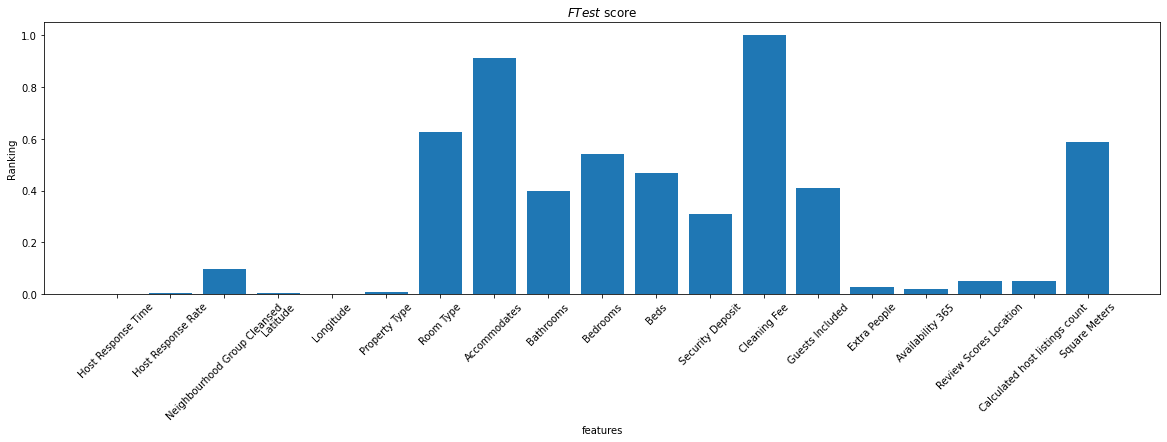

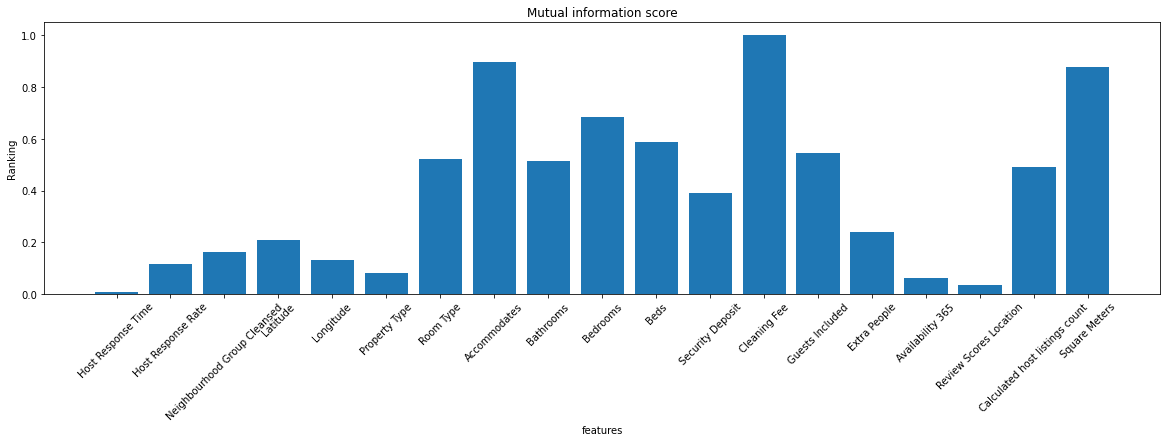

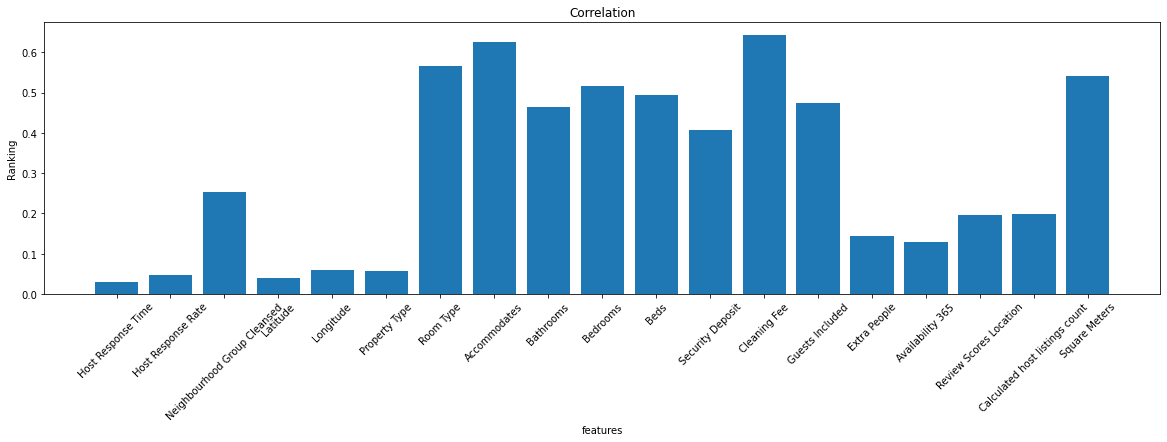

Cleaning Fee                      0.880686
Accommodates                      0.810536
Square Meters                     0.668058
Bedrooms                          0.580064
Room Type                         0.571010
Beds                              0.516537
Guests Included                   0.476582
Bathrooms                         0.458133
Security Deposit                  0.368576
Calculated host listings count    0.247400
Neighbourhood Group Cleansed      0.170307
Extra People                      0.136863
Review Scores Location            0.094016
Latitude                          0.083616
Availability 365                  0.069608
Longitude                         0.065034
Host Response Rate                0.055593
Property Type                     0.049509
Host Response Time                0.012075
Name: Price, dtype: float64


In [101]:
# F-Test
plt.figure(figsize=(20, 5))

plt.bar(range(X.shape[1]), f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

# Mutual-Test
plt.figure(figsize=(20, 5))

plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

corr['Price']
plt.figure(figsize=(20, 5))

plt.bar(corr['Price'][1:].index, corr['Price'][1:],  align="center")
plt.xticks(range(X.shape[1]), featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Correlation')

plt.show()

res = (f_test + mi + corr['Price'][1:]) / 3
print(res.sort_values(ascending=False))

In [102]:
# Como criterio voy a seleccionar las características mayor de 0.1 en el ranking
cols = corr['Price'][1:][(f_test + mi + corr['Price'][1:]) / 3 > 0.1].index
train = train[cols.insert(0, 'Price')]
train.describe()

Price  Neighbourhood Group Cleansed     Room Type  Accommodates  \
count  10159.000000                  10159.000000  10159.000000  10159.000000   
mean       3.950677                     67.291564     72.824814      3.177084   
std        0.668681                     14.145319     27.031280      1.968406   
min        2.197225                     34.532982     30.674641      1.000000   
25%        3.401197                     58.739130     40.541570      2.000000   
50%        3.951244                     72.778516     95.171075      2.000000   
75%        4.382027                     72.778516     95.171075      4.000000   
max        6.774224                     93.258824     95.171075     16.000000   

          Bathrooms      Bedrooms          Beds  Security Deposit  \
count  10120.000000  10143.000000  10120.000000       4255.000000   
mean       1.249704      1.298728      1.983498          5.089793   
std        0.589755      0.817554      1.493546          0.473059   
min        0.000000      0.000000      1.000000          4.248495   
25%        1.000000      1.000000      1.000000          4.605170   
50%        1.000000      1.000000      2.000000          5.010635   
75%        1.000000      2.000000      2.000000          5.298317   
max        8.000000     10.000000     16.000000          6.897705   

       Cleaning Fee  Guests Included  Extra People  \
count   5939.000000     10159.000000  10159.000000   
mean       3.146322         1.567576      7.164189   
std        0.695382         1.060735      9.215134   
min        1.386294         1.000000      0.000000   
25%        2.708050         1.000000      0.000000   
50%        3.218876         1.000000      0.000000   
75%        3.555348         2.000000     13.000000   
max        6.214608        16.000000    150.000000   

       Calculated host listings count  Square Meters  
count                    10159.000000   10100.000000  
mean                         7.546904      46.835506  
std                         19.341811      41.749602  
min                          1.000000     -40.473181  
25%                          1.000000      16.522365  
50%                          2.000000      35.311795  
75%                          4.000000      59.821073  
max                        145.000000     537.098519

### 4.- Algoritmo ML y Optimización

In [103]:
# Primero preparamos los datos

In [104]:
test['Price'] = np.log(test['Price'])
test['Cleaning Fee'] = np.log(test['Cleaning Fee'])
test['Security Deposit'] = np.log(test['Security Deposit'])

In [105]:
for c in categorical:
    test[c] = test[c].map(mean_map[c])

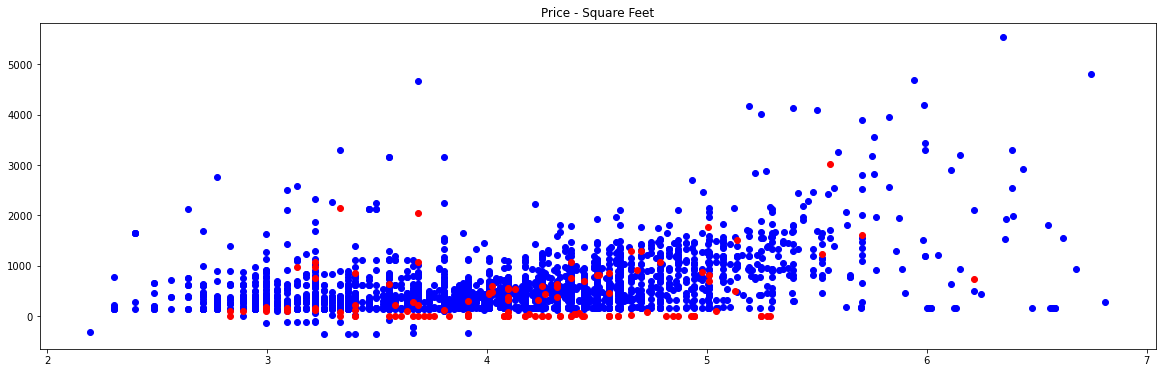

In [106]:
# Predecimos valores de Square Feet con nuestro modelo entrenado en train
X = test[test['Square Feet'].isna()][f_test_features].dropna()
y_hat = grid_f.predict(X[f_test_features])
test.loc[X.index.values,'Square Feet'] = y_hat

# Tamaño de la figura
plt.figure(figsize=(20,6))

# Subplots
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(test[test.index.isin(X.index)], 'Price', 'Square Feet', color='blue')
plt.subplot(1, 1, 1)
scatter_feature_vs_target_feature(test[~test.index.isin(X.index)], 'Price', 'Square Feet', color='red')

In [107]:
# Pasamos valores de test a m^2
test = feet_to_meters(test)[cols.insert(0, 'Price')]

In [108]:
test = test[cols.insert(0, 'Price')]

In [109]:
test.columns

Index(['Price', 'Neighbourhood Group Cleansed', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Calculated host listings count',
       'Square Meters'],
      dtype='object')

In [110]:
# Vamos a probar con y sin Square Meters

# Con
train1 = train.copy()
train1 = train1.dropna()
test1 = test.copy()
test1 = test1.dropna()
print(train1.shape)
print(test1.shape)

# Sin
train2 = train.copy()
train2 = train2.drop(['Square Meters'], axis=1).dropna()
test2 = test.copy()
test2 = test2.drop(['Square Meters'], axis=1).dropna()
print(train2.shape)
print(test2.shape)

del train
del test

(3444, 13)
(989, 13)
(3444, 12)
(989, 12)


In [111]:
# Define grid
param_grid = dict()
param_grid['alpha'] = np.logspace(-3, 0, 20)
param_grid['l1_ratio'] = np.logspace(-3, 0, 20)
param_grid['random_state'] = [seed]

# define search
grid = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1)

In [112]:
# Prueba con Square Meters

X_train = train1.drop('Price', axis=1)
y_train = train1[['Price']].values.ravel()
X_test = test1.drop('Price', axis=1)
y_test = test1['Price'].values.ravel()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressors = [
    (KNeighborsRegressor(),
     {'n_neighbors': [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}),
    (GradientBoostingRegressor(random_state=seed), 
     {'n_estimators': [500,1000,1500],'learning_rate':[0.1,0.05]}),
    (RandomForestRegressor(random_state=seed), 
     {'max_depth': range(1,15)}),
    (DecisionTreeRegressor(random_state=seed), 
     {'max_depth': range(1,15)}),
    (BaggingRegressor(DecisionTreeRegressor(), random_state=seed), 
     {'base_estimator__max_depth': range(1,15)}),
    (Lasso(random_state=seed),
     {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}),
    (Ridge(random_state=seed),
     {'alpha': [200, 230, 250,265, 270, 275, 290, 300, 500]}),
    (ElasticNet(random_state=seed),
     {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio':[0.001, 0.01, 0.1, 1]}),
    (SVR(),
     {'C': [0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel': ['rbf']})
]

models1 = {}
model_name = []
mse = []
r_2 = []
for regressor in regressors:
    # Modelo e hiperparámetros
    model = regressor[0]
    param_grid = regressor[1]
    print(model)
    # Grid
    grid = GridSearchCV(model, scoring= 'r2', param_grid=param_grid, cv = 5, verbose=1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test) 
    model_name.append(str(model))
    mse.append(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    r_2.append(r2_score(y_test, y_pred))
    models1[str(model)] = grid

print("Modelos (utilizando Square Meters)")
pd.DataFrame({"RMSE":np.sqrt(mse), "MSE":mse, "R2":r_2}, index=model_name).sort_values(by='R2', ascending=False)

KNeighborsRegressor()
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GradientBoostingRegressor(random_state=9876)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForestRegressor(random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
DecisionTreeRegressor(random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Lasso(random_state=9876)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge(random_state=9876)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
ElasticNet(random_state=9876)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVR()
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Modelos (utilizando Square Meters)


RMSE          MSE  \
RandomForestRegressor(random_state=9876)            33.725212  1137.389915   
GradientBoostingRegressor(random_state=9876)        36.579152  1338.034350   
BaggingRegressor(base_estimator=DecisionTreeReg...  35.203378  1239.277814   
KNeighborsRegressor()                               36.380654  1323.552016   
ElasticNet(random_state=9876)                       39.949013  1595.923616   
Ridge(random_state=9876)                            39.648794  1572.026875   
SVR()                                               39.195587  1536.294050   
Lasso(random_state=9876)                            38.137838  1454.494651   
DecisionTreeRegressor(random_state=9876)            40.014526  1601.162319   

                                                          R2  
RandomForestRegressor(random_state=9876)            0.761613  
GradientBoostingRegressor(random_state=9876)        0.751147  
BaggingRegressor(base_estimator=DecisionTreeReg...  0.749077  
KNeighborsRegressor()                               0.744044  
ElasticNet(random_state=9876)                       0.701745  
Ridge(random_state=9876)                            0.701348  
SVR()                                               0.699268  
Lasso(random_state=9876)                            0.695137  
DecisionTreeRegressor(random_state=9876)            0.678304

In [120]:
# Prueba sin Square Meters

X_train = train2.drop('Price', axis=1)
y_train = train2[['Price']].values.ravel()
X_test = test2.drop('Price', axis=1)
y_test = test2['Price'].values.ravel()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressors = [
    (KNeighborsRegressor(),
     {'n_neighbors': [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}),
    (GradientBoostingRegressor(random_state=seed), 
     {'n_estimators': [500,1000,1500],'learning_rate':[0.1,0.05]}),
    (RandomForestRegressor(random_state=seed), 
     {'max_depth': range(1,15)}),
    (DecisionTreeRegressor(random_state=seed), 
     {'max_depth': range(1,15)}),
    (BaggingRegressor(DecisionTreeRegressor(), random_state=seed), 
     {'base_estimator__max_depth': range(1,15)}),
    (Lasso(random_state=seed),
     {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}),
    (Ridge(random_state=seed),
     {'alpha': [200, 230, 250,265, 270, 275, 290, 300, 500]}),
    (ElasticNet(random_state=seed),
     {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio':[0.001, 0.01, 0.1, 1]}),
    (SVR(),
     {'C': [0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel': ['rbf']})
]

models2 = {}
model_name = []
mse = []
r_2 = []
for regressor in regressors:
    # Modelo e hiperparámetros
    model = regressor[0]
    param_grid = regressor[1]
    print(model)
    # Grid
    grid = GridSearchCV(model, scoring= 'r2', param_grid=param_grid, cv = 5, verbose=1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test) 
    model_name.append(str(model))
    mse.append(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    r_2.append(r2_score(y_test, y_pred))
    models2[str(model)] = grid

print("Modelos (utilizando Square Meters)")
pd.DataFrame({"RMSE":np.sqrt(mse), "MSE":mse, "R2":r_2}, index=model_name).sort_values(by='R2', ascending=False)

KNeighborsRegressor()
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GradientBoostingRegressor(random_state=9876)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForestRegressor(random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
DecisionTreeRegressor(random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=9876)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Lasso(random_state=9876)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge(random_state=9876)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
ElasticNet(random_state=9876)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVR()
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Modelos (utilizando Square Meters)


RMSE          MSE  \
RandomForestRegressor(random_state=9876)            34.323422  1178.097304   
GradientBoostingRegressor(random_state=9876)        37.514366  1407.327629   
BaggingRegressor(base_estimator=DecisionTreeReg...  35.166833  1236.706132   
KNeighborsRegressor()                               36.280349  1316.263710   
ElasticNet(random_state=9876)                       40.077426  1606.200059   
Ridge(random_state=9876)                            39.680643  1574.553465   
SVR()                                               39.617307  1569.531011   
Lasso(random_state=9876)                            38.137928  1454.501562   
DecisionTreeRegressor(random_state=9876)            38.890463  1512.468100   

                                                          R2  
RandomForestRegressor(random_state=9876)            0.761012  
GradientBoostingRegressor(random_state=9876)        0.748969  
BaggingRegressor(base_estimator=DecisionTreeReg...  0.745125  
KNeighborsRegressor()                               0.743764  
ElasticNet(random_state=9876)                       0.701040  
Ridge(random_state=9876)                            0.700855  
SVR()                                               0.698053  
Lasso(random_state=9876)                            0.695137  
DecisionTreeRegressor(random_state=9876)            0.669554

In [121]:
# Podemos ver que el mejor modelo es el de Random Forest Regressor
# Analizémoslo

grid = models1['RandomForestRegressor(random_state=9876)']

best mean cross-validation score: 0.737
best parameters: {'max_depth': 11}


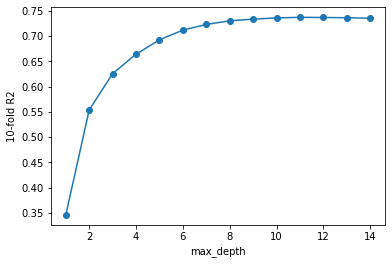

In [122]:
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(range(1,15),scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold R2')

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [123]:
X_train = train2.drop('Price', axis=1)
y_train = train2[['Price']].values.ravel()
X_test = test2.drop('Price', axis=1)
y_test = test2['Price'].values.ravel()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
maxDepthOptimo = 6
grid.estimator.max_depth = maxDepthOptimo
rfr = grid.estimator.fit(X_train,y_train)
print("Train: ",rfr.score(X_train,y_train))
print("Test: ",rfr.score(X_test,y_test))

Train:  0.7601497354272236
Test:  0.7245049219819867


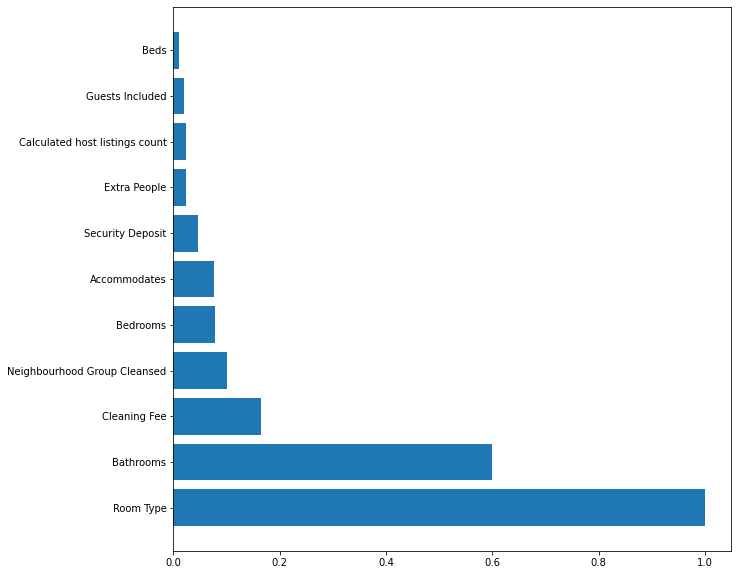

In [125]:
importances = rfr.feature_importances_
importances = importances / np.max(importances)

features = train2.columns.drop('Price')
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

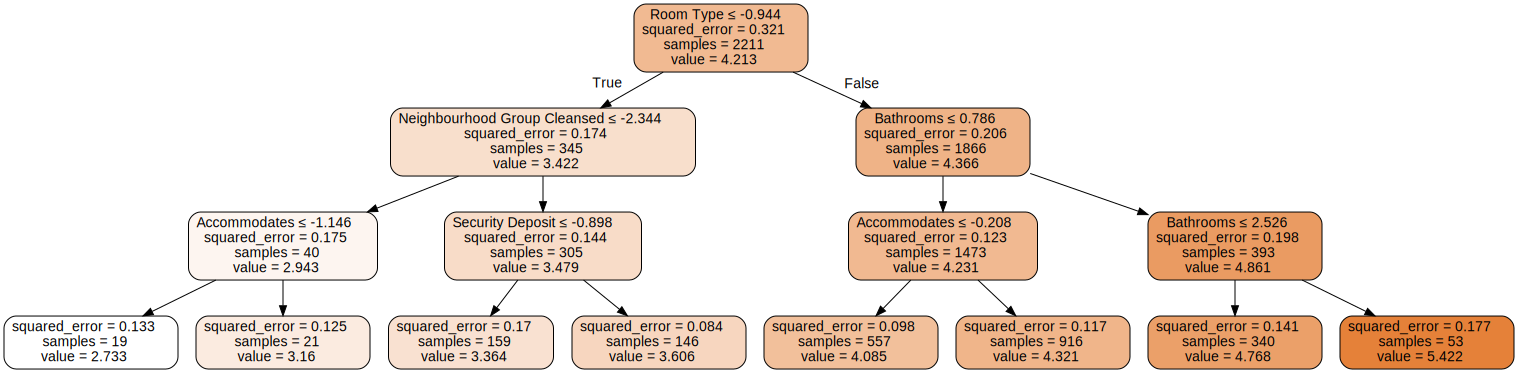

In [126]:
import graphviz

grid.estimator.max_depth = 3
rfr = grid.estimator.fit(X_train,y_train)

dot_data = tree.export_graphviz(rfr[0], out_file=None, 
                         feature_names=train2.drop('Price', axis=1).columns,  
                         class_names=['apple','mandarin','orange','lemon'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph